In [1]:
import numpy as np
import math
import collections.abc
from MLP import MLP
import matplotlib.pyplot as plt

### Generate 500 vectors containing 4 components each. The value of each component should be a random number between -1 and 1. These will be your input vectors. The corresponding output for each vector should be the sin() of a combination of the components. Specifically, for inputs:
* [x1 x2 x3 x4]
* the (single component) output should be:
* sin(x1-x2+x3-x4)

In [2]:
# **Vector dataset for regression**
#creating dataset for training-testing-validation
input_dataset=np.random.uniform(-1,1,(500,4))
def target_generator(vector):
    return math.sin(vector[0]-vector[1]+vector[2]-vector[3])
target_dataset=np.apply_along_axis(target_generator, 1, input_dataset)
print(f"full dataset; input: {input_dataset.shape}, target: {target_dataset.shape}")

full dataset; input: (500, 4), target: (500,)


In [3]:
input_dataset[:2,:]

array([[-0.83388757,  0.42996379, -0.88012469,  0.55769877],
       [ 0.41851718, -0.06363634,  0.76667064, -0.11690138]])

In [4]:
print(input_dataset.min(),input_dataset.max())

-0.9993860077679293 0.9984410046639485


In [5]:
target_dataset[:2]

array([-0.42586513,  0.97904657])

In [6]:
print(target_dataset.min(),target_dataset.max())

-0.9999917328899853 0.9998935472890297


In [7]:
#splitting dataset to train (400 sample) -test(50 sample) -validation(50 sample)
input_train,input_test, input_valid =input_dataset[:400,:], input_dataset[400:450,:], input_dataset[450:,:]
print(f"input train: {input_train.shape}, test: {input_test.shape}, validation: {input_valid.shape}")
target_train,target_test, target_valid =target_dataset[:400], target_dataset[400:450], target_dataset[450:]
print(f"target train: {target_train.shape}, test: {target_test.shape}, validation: {target_valid.shape}")

input train: (400, 4), test: (50, 4), validation: (50, 4)
target train: (400,), test: (50,), validation: (50,)


### Now train an MLP with 4 inputs, at least 5 hidden units and one output on 400 of these examples and keep the remaining 100 for testing.

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]
 [-0.26213824 -0.35500448 -0.42656755  0.48769385]
 [-0.12741305 -0.10951858 -0.31319884  0.19437259]
 [-0.40347446 -0.05318507 -0.22386664  0.09672562]
 [-0.12770128 -0.29515805 -0.00704556  0.10708297]
 [ 0.01662931  0.07561797 -0.15858052 -0.09068529]
 [-0.16811511 -0.08988829 -0.20328657 -0.43157065]
 [ 0.04435654 -0.10044523 -0.40754959  0.11569556]
 [-0.22682459  0.01298635  0.18227264  0.03224573]
 [ 0.28485017 -0.30870646  0.10058541 -0.17120252

epoch:0 cost:11.1339
epoch:1 cost:10.8847
epoch:2 cost:10.6418
epoch:3 cost:10.4049
epoch:4 cost:10.1740
epoch:5 cost:9.9489
epoch:6 cost:9.7293
epoch:7 cost:9.5153
epoch:8 cost:9.3066
epoch:9 cost:9.1032
epoch:10 cost:8.9048
epoch:11 cost:8.7113
epoch:12 cost:8.5227
epoch:13 cost:8.3387
epoch:14 cost:8.1593
epoch:15 cost:7.9844
epoch:16 cost:7.8138
epoch:17 cost:7.6474
epoch:18 cost:7.4852
epoch:19 cost:7.3270
epoch:20 cost:7.1726
epoch:21 cost:7.0221
epoch:22 cost:6.8753
epoch:23 cost:6.7321
epoch:24 cost:6.5924
epoch:25 cost:6.4562
epoch:26 cost:6.3233
epoch:27 cost:6.1937
epoch:28 cost:6.0673
epoch:29 cost:5.9439
epoch:30 cost:5.8236
epoch:31 cost:5.7062
epoch:32 cost:5.5917
epoch:33 cost:5.4799
epoch:34 cost:5.3709
epoch:35 cost:5.2646
epoch:36 cost:5.1608
epoch:37 cost:5.0595
epoch:38 cost:4.9607
epoch:39 cost:4.8643
epoch:40 cost:4.7703
epoch:41 cost:4.6785
epoch:42 cost:4.5889
epoch:43 cost:4.5015
epoch:44 cost:4.4162
epoch:45 cost:4.3329
epoch:46 cost:4.2517
epoch:47 cost:4.17

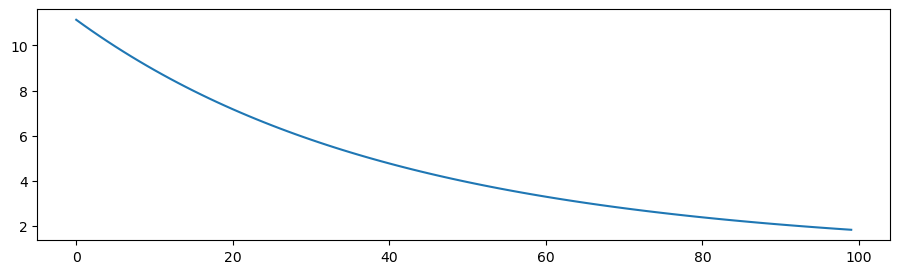

In [8]:
# Seed the random number generator, so we get the same random numbers each time
np.random.seed(0)
epochs=100
learning_rate=0.0004
num_inputs=4
num_hidden= 128
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_sigmoid=MLP(input_train,target_train, paramlist)
sin_MLP_8_ha_sigmoid.train()

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]
 [-0.26213824 -0.35500448 -0.42656755  0.48769385]
 [-0.12741305 -0.10951858 -0.31319884  0.19437259]
 [-0.40347446 -0.05318507 -0.22386664  0.09672562]
 [-0.12770128 -0.29515805 -0.00704556  0.10708297]
 [ 0.01662931  0.07561797 -0.15858052 -0.09068529]
 [-0.16811511 -0.08988829 -0.20328657 -0.43157065]
 [ 0.04435654 -0.10044523 -0.40754959  0.11569556]
 [-0.22682459  0.01298635  0.18227264  0.03224573]
 [ 0.28485017 -0.30870646  0.10058541 -0.17120252

epoch:0 cost:2.2016
epoch:1 cost:2.1949
epoch:2 cost:2.1882
epoch:3 cost:2.1816
epoch:4 cost:2.1750
epoch:5 cost:2.1684
epoch:6 cost:2.1619
epoch:7 cost:2.1554
epoch:8 cost:2.1489
epoch:9 cost:2.1424
epoch:10 cost:2.1360
epoch:11 cost:2.1296
epoch:12 cost:2.1232
epoch:13 cost:2.1168
epoch:14 cost:2.1105
epoch:15 cost:2.1042
epoch:16 cost:2.0979
epoch:17 cost:2.0917
epoch:18 cost:2.0855
epoch:19 cost:2.0793
epoch:20 cost:2.0731
epoch:21 cost:2.0670
epoch:22 cost:2.0609
epoch:23 cost:2.0548
epoch:24 cost:2.0487
epoch:25 cost:2.0427
epoch:26 cost:2.0367
epoch:27 cost:2.0307
epoch:28 cost:2.0247
epoch:29 cost:2.0188
epoch:30 cost:2.0129
epoch:31 cost:2.0070
epoch:32 cost:2.0012
epoch:33 cost:1.9953
epoch:34 cost:1.9895
epoch:35 cost:1.9837
epoch:36 cost:1.9780
epoch:37 cost:1.9722
epoch:38 cost:1.9665
epoch:39 cost:1.9608
epoch:40 cost:1.9552
epoch:41 cost:1.9495
epoch:42 cost:1.9439
epoch:43 cost:1.9383
epoch:44 cost:1.9328
epoch:45 cost:1.9272
epoch:46 cost:1.9217
epoch:47 cost:1.9162
ep

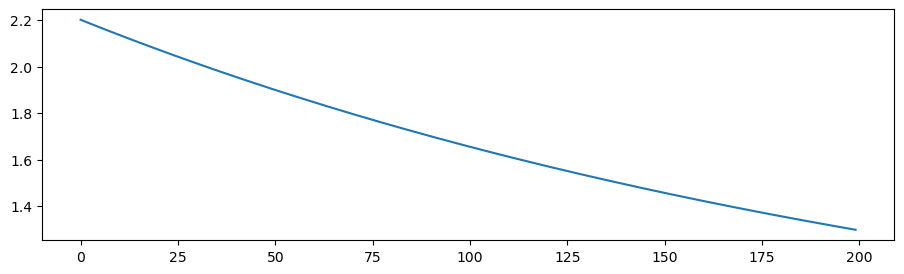

In [9]:
np.random.seed(0)
epochs=200
learning_rate=0.0004
num_inputs=4
num_hidden= 128
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_Tanh=MLP(input_train,target_train, paramlist,hidden_activation="Tanh")
sin_MLP_8_ha_Tanh.train()

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]
 [-0.26213824 -0.35500448 -0.42656755  0.48769385]
 [-0.12741305 -0.10951858 -0.31319884  0.19437259]
 [-0.40347446 -0.05318507 -0.22386664  0.09672562]
 [-0.12770128 -0.29515805 -0.00704556  0.10708297]
 [ 0.01662931  0.07561797 -0.15858052 -0.09068529]
 [-0.16811511 -0.08988829 -0.20328657 -0.43157065]
 [ 0.04435654 -0.10044523 -0.40754959  0.11569556]
 [-0.22682459  0.01298635  0.18227264  0.03224573]
 [ 0.28485017 -0.30870646  0.10058541 -0.17120252

epoch:0 cost:1.5276
epoch:1 cost:1.5253
epoch:2 cost:1.5231
epoch:3 cost:1.5208
epoch:4 cost:1.5186
epoch:5 cost:1.5164
epoch:6 cost:1.5141
epoch:7 cost:1.5119
epoch:8 cost:1.5097
epoch:9 cost:1.5075
epoch:10 cost:1.5053
epoch:11 cost:1.5031
epoch:12 cost:1.5009
epoch:13 cost:1.4987
epoch:14 cost:1.4966
epoch:15 cost:1.4944
epoch:16 cost:1.4922
epoch:17 cost:1.4901
epoch:18 cost:1.4880
epoch:19 cost:1.4858
epoch:20 cost:1.4837
epoch:21 cost:1.4816
epoch:22 cost:1.4794
epoch:23 cost:1.4773
epoch:24 cost:1.4752
epoch:25 cost:1.4731
epoch:26 cost:1.4710
epoch:27 cost:1.4690
epoch:28 cost:1.4669
epoch:29 cost:1.4648
epoch:30 cost:1.4628
epoch:31 cost:1.4607
epoch:32 cost:1.4586
epoch:33 cost:1.4566
epoch:34 cost:1.4546
epoch:35 cost:1.4525
epoch:36 cost:1.4505
epoch:37 cost:1.4485
epoch:38 cost:1.4465
epoch:39 cost:1.4445
epoch:40 cost:1.4425
epoch:41 cost:1.4405
epoch:42 cost:1.4385
epoch:43 cost:1.4365
epoch:44 cost:1.4345
epoch:45 cost:1.4325
epoch:46 cost:1.4306
epoch:47 cost:1.4286
ep

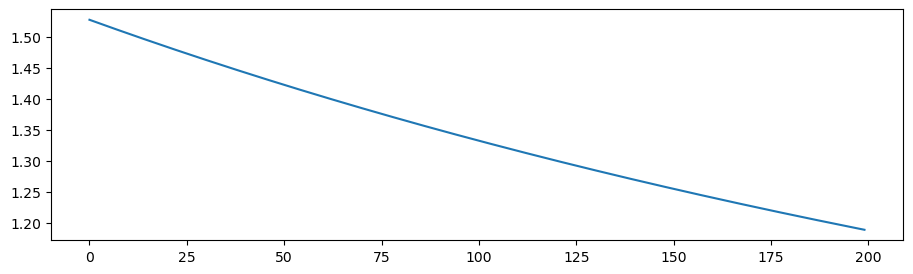

In [10]:
np.random.seed(0)
epochs=200
learning_rate=0.0004
num_inputs=4
num_hidden= 128
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_ReLU=MLP(input_train,target_train, paramlist,hidden_activation="ReLU")
sin_MLP_8_ha_ReLU.train()

### What is the error on training at the end? How does it compare with the error on the test set? Do you think you have learned satisfactorily?

counter: 2
activation: -1.07
target: -0.18
counter: 3
activation: -0.68
target: -0.88
counter: 4
activation: -1.1
target: -1.0
counter: 5
activation: -1.09
target: 0.23
counter: 6
activation: -0.91
target: 0.82
counter: 7
activation: -0.83
target: 0.97
counter: 8
activation: -0.93
target: 0.61
counter: 9
activation: -1.52
target: -0.97
counter: 10
activation: -0.67
target: -0.09
counter: 11
activation: -1.4
target: 0.86
counter: 12
activation: -1.21
target: -0.51
counter: 13
activation: -1.39
target: 0.14
counter: 14
activation: -1.46
target: -0.16
counter: 15
activation: -0.83
target: -0.0
counter: 16
activation: -1.36
target: 0.39
counter: 17
activation: -1.36
target: 0.54
counter: 18
activation: -1.49
target: -0.23
counter: 19
activation: -1.23
target: -0.36
counter: 20
activation: -0.62
target: -0.39
counter: 21
activation: -0.97
target: 0.73
counter: 22
activation: -1.33
target: -0.97
counter: 23
activation: -0.72
target: 0.11
counter: 24
activation: -1.38
target: 0.1
counter: 25


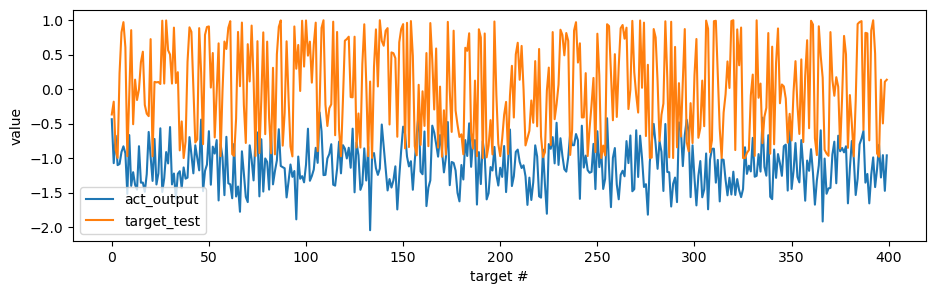

In [11]:
sin_MLP_8_ha_sigmoid.sin_test(input_train,target_train)

counter: 1
activation: -1.6
target: -0.81
counter: 2
activation: -0.85
target: -0.15
counter: 3
activation: -1.34
target: -0.28
counter: 4
activation: -1.71
target: -1.0
counter: 5
activation: -1.53
target: -0.98
counter: 6
activation: -1.1
target: 0.77
counter: 7
activation: -1.06
target: -0.06
counter: 8
activation: -0.91
target: -0.07
counter: 9
activation: -1.11
target: -0.33
counter: 10
activation: -0.89
target: -0.56
counter: 11
activation: -1.34
target: -0.7
counter: 12
activation: -1.09
target: 0.14
counter: 13
activation: -0.56
target: -0.35
counter: 14
activation: -1.23
target: 0.14
counter: 15
activation: -1.1
target: -0.43
counter: 16
activation: -0.89
target: -0.37
counter: 17
activation: -1.28
target: -0.4
counter: 18
activation: -1.36
target: 0.8
counter: 19
activation: -0.93
target: -0.02
counter: 20
activation: -0.46
target: -0.44
counter: 21
activation: -0.73
target: -0.79
counter: 22
activation: -1.1
target: -0.99
counter: 23
activation: -0.83
target: -0.65
counter: 

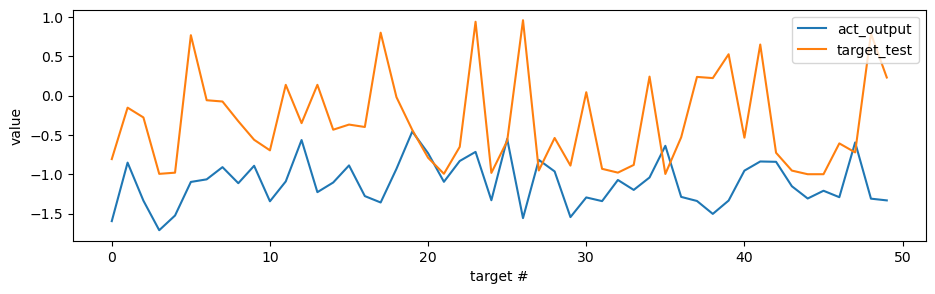

In [12]:
sin_MLP_8_ha_sigmoid.sin_test(input_test,target_test)

counter: 1
activation: 1.75
target: -0.37
counter: 2
activation: -0.01
target: -0.18
counter: 3
activation: 1.04
target: -0.88
counter: 4
activation: -0.19
target: -1.0
counter: 5
activation: -0.03
target: 0.23
counter: 6
activation: 0.34
target: 0.82
counter: 7
activation: 0.66
target: 0.97
counter: 8
activation: 0.37
target: 0.61
counter: 9
activation: -1.39
target: -0.97
counter: 10
activation: 1.13
target: -0.09
counter: 11
activation: -0.9
target: 0.86
counter: 13
activation: -0.96
target: 0.14
counter: 14
activation: -1.16
target: -0.16
counter: 15
activation: 0.71
target: -0.0
counter: 16
activation: -0.83
target: 0.39
counter: 17
activation: -0.9
target: 0.54
counter: 18
activation: -1.32
target: -0.23
counter: 19
activation: -0.59
target: -0.36
counter: 20
activation: 1.23
target: -0.39
counter: 21
activation: 0.22
target: 0.73
counter: 22
activation: -0.84
target: -0.97
counter: 23
activation: 1.0
target: 0.11
counter: 24
activation: -0.96
target: 0.1
counter: 25
activation: 

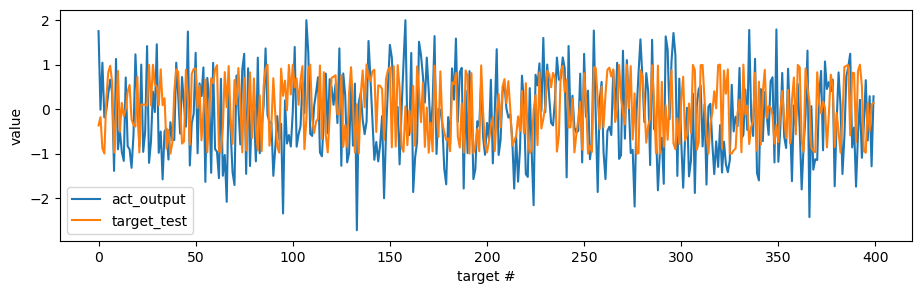

In [13]:
sin_MLP_8_ha_Tanh.sin_test(input_train,target_train)

counter: 1
activation: -1.6
target: -0.81
counter: 2
activation: 0.54
target: -0.15
counter: 3
activation: -0.77
target: -0.28
counter: 4
activation: -1.88
target: -1.0
counter: 5
activation: -1.36
target: -0.98
counter: 6
activation: -0.13
target: 0.77
counter: 7
activation: 0.0
target: -0.06
counter: 8
activation: 0.35
target: -0.07
counter: 9
activation: -0.23
target: -0.33
counter: 10
activation: 0.5
target: -0.56
counter: 11
activation: -0.85
target: -0.7
counter: 12
activation: -0.17
target: 0.14
counter: 13
activation: 1.38
target: -0.35
counter: 14
activation: -0.52
target: 0.14
counter: 15
activation: -0.16
target: -0.43
counter: 16
activation: 0.5
target: -0.37
counter: 17
activation: -0.65
target: -0.4
counter: 18
activation: -0.88
target: 0.8
counter: 19
activation: 0.4
target: -0.02
counter: 20
activation: 1.69
target: -0.44
counter: 21
activation: 0.89
target: -0.79
counter: 22
activation: -0.18
target: -0.99
counter: 23
activation: 0.52
target: -0.65
counter: 24
activati

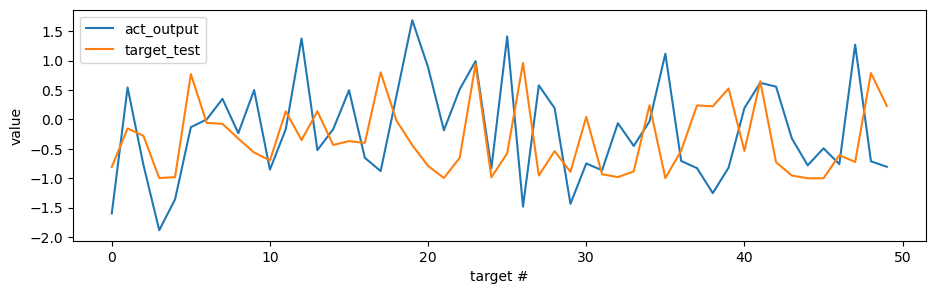

In [14]:
sin_MLP_8_ha_Tanh.sin_test(input_test,target_test)

counter: 1
activation: 0.74
target: -0.37
counter: 2
activation: -0.45
target: -0.18
counter: 3
activation: 0.13
target: -0.88
counter: 4
activation: -0.53
target: -1.0
counter: 5
activation: -0.15
target: 0.23
counter: 6
activation: -0.28
target: 0.82
counter: 7
activation: 0.2
target: 0.97
counter: 8
activation: -0.49
target: 0.61
counter: 9
activation: -1.07
target: -0.97
counter: 10
activation: 0.54
target: -0.09
counter: 11
activation: -1.47
target: 0.86
counter: 12
activation: -0.58
target: -0.51
counter: 13
activation: -0.99
target: 0.14
counter: 14
activation: -1.24
target: -0.16
counter: 15
activation: 0.19
target: -0.0
counter: 16
activation: -0.65
target: 0.39
counter: 17
activation: -1.27
target: 0.54
counter: 18
activation: -1.06
target: -0.23
counter: 19
activation: -0.62
target: -0.36
counter: 20
activation: 0.56
target: -0.39
counter: 21
activation: -0.17
target: 0.73
counter: 22
activation: -1.36
target: -0.97
counter: 23
activation: 0.33
target: 0.11
counter: 24
activ

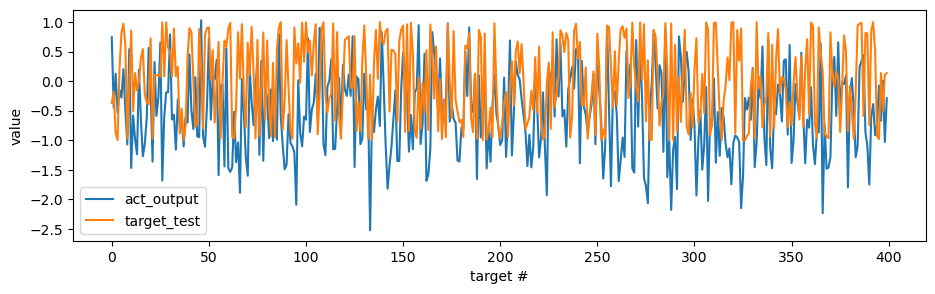

In [15]:
sin_MLP_8_ha_ReLU.sin_test(input_train,target_train)

counter: 1
activation: -1.12
target: -0.81
counter: 2
activation: 0.11
target: -0.15
counter: 3
activation: -0.94
target: -0.28
counter: 4
activation: -1.52
target: -1.0
counter: 5
activation: -1.63
target: -0.98
counter: 6
activation: -0.43
target: 0.77
counter: 7
activation: -0.43
target: -0.06
counter: 8
activation: -0.3
target: -0.07
counter: 9
activation: -0.22
target: -0.33
counter: 10
activation: 0.05
target: -0.56
counter: 11
activation: -1.3
target: -0.7
counter: 12
activation: -0.7
target: 0.14
counter: 13
activation: 0.58
target: -0.35
counter: 14
activation: -0.5
target: 0.14
counter: 15
activation: -0.58
target: -0.43
counter: 16
activation: 0.13
target: -0.37
counter: 17
activation: -0.49
target: -0.4
counter: 18
activation: -1.25
target: 0.8
counter: 19
activation: -0.12
target: -0.02
counter: 20
activation: 0.69
target: -0.44
counter: 21
activation: 0.05
target: -0.79
counter: 22
activation: -1.14
target: -0.99
counter: 23
activation: -0.49
target: -0.65
counter: 24
act

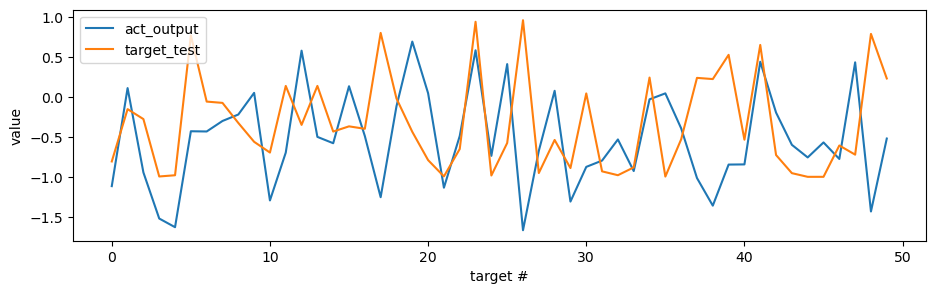

In [16]:
sin_MLP_8_ha_ReLU.sin_test(input_test,target_test)

##### Trying to optimize best performing model for better accuracy using ReLU  and TanH activation functions for hidden unit activation

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]]
weights@ start, hidden->output : [[-0.26213824 -0.35500448 -0.42656755  0.48769385 -0.12741305 -0.10951858
  -0.31319884  0.19437259 -0.40347446 -0.05318507]]
epoch:0 cost:0.6182
epoch:1 cost:0.6180
epoch:2 cost:0.6178
epoch:3 cost:0.6177
epoch:4 cost:0.6175
epoch:5 cost:0.6173
epoch:6 cost:0.6171
epoch:7 cost:0.6169
epoch:8 cost:0.6167
epoch:9 cost:0.6165
epoch:10 cost:0.6163
epoch:11 cost:0.6161
epoch:12 cost:0.6160
epoch:13 cost:0.6158
epoch:14 cost

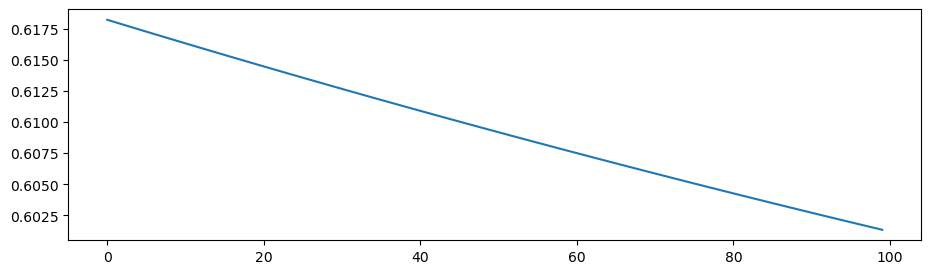

In [8]:
np.random.seed(0)
epochs=100
learning_rate=0.0004
num_inputs=4
num_hidden= 10
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_ReLU_v2=MLP(input_train,target_train, paramlist,hidden_activation="ReLU")
sin_MLP_8_ha_ReLU_v2.train()

counter: 1
activation: -0.07
target: 0.47
counter: 2
activation: -0.07
target: 0.94
counter: 3
activation: -0.14
target: -0.94
counter: 4
activation: -0.05
target: -0.62
counter: 5
activation: 0.06
target: -0.71
counter: 6
activation: -0.54
target: 0.87
counter: 7
activation: -0.11
target: 0.43
counter: 9
activation: 0.06
target: -0.77
counter: 10
activation: -0.05
target: -0.96
counter: 11
activation: -0.22
target: -0.97
counter: 12
activation: -0.07
target: -0.18
counter: 13
activation: -0.08
target: -0.8
counter: 14
activation: -0.26
target: -0.89
counter: 15
activation: 0.07
target: 0.52
counter: 16
activation: -0.17
target: 0.23
counter: 17
activation: -0.4
target: 0.73
counter: 18
activation: -0.52
target: 0.42
counter: 20
activation: -0.06
target: -0.04
counter: 21
activation: -0.11
target: 0.32
counter: 22
activation: -0.04
target: -0.09
counter: 24
activation: 0.0
target: -0.64
counter: 25
activation: -0.01
target: -0.84
counter: 26
activation: -0.01
target: -0.95
counter: 27


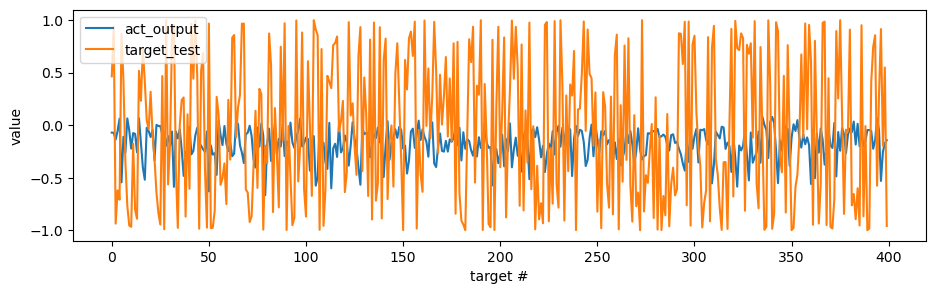

counter: 1
activation: -0.29
target: 1.0
counter: 2
activation: -0.31
target: 0.63
counter: 3
activation: -0.21
target: 0.98
counter: 4
activation: -0.0
target: -0.28
counter: 5
activation: -0.38
target: -0.18
counter: 6
activation: -0.25
target: 0.86
counter: 8
activation: -0.21
target: -1.0
counter: 9
activation: -0.05
target: 0.89
counter: 10
activation: -0.27
target: -0.94
counter: 11
activation: 0.02
target: -0.47
counter: 13
activation: -0.54
target: -0.23
counter: 14
activation: -0.04
target: -0.8
counter: 15
activation: -0.16
target: -0.92
counter: 17
activation: -0.1
target: 0.27
counter: 18
activation: -0.02
target: 0.32
counter: 19
activation: -0.18
target: 0.99
counter: 20
activation: -0.02
target: -0.19
counter: 21
activation: -0.42
target: 0.52
counter: 22
activation: -0.1
target: 0.44
counter: 23
activation: -0.53
target: -0.06
counter: 24
activation: 0.01
target: -0.99
counter: 25
activation: 0.05
target: -0.62
counter: 26
activation: -0.23
target: 0.41
counter: 27
acti

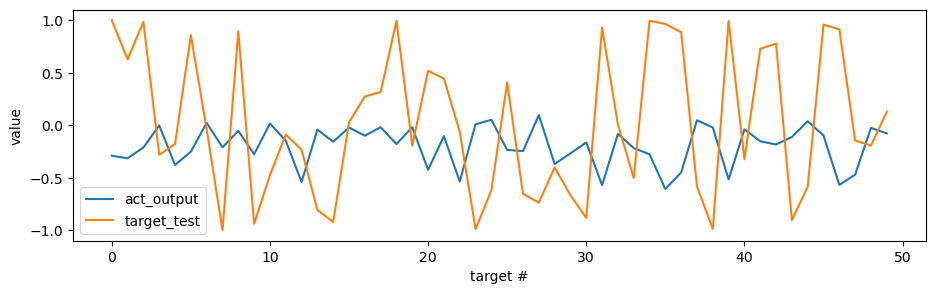

In [10]:
sin_MLP_8_ha_ReLU_v2.sin_test(input_train,target_train)
sin_MLP_8_ha_ReLU_v2.sin_test(input_test,target_test)

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]
 [-0.26213824 -0.35500448 -0.42656755  0.48769385]
 [-0.12741305 -0.10951858 -0.31319884  0.19437259]
 [-0.40347446 -0.05318507 -0.22386664  0.09672562]
 [-0.12770128 -0.29515805 -0.00704556  0.10708297]
 [ 0.01662931  0.07561797 -0.15858052 -0.09068529]
 [-0.16811511 -0.08988829 -0.20328657 -0.43157065]
 [ 0.04435654 -0.10044523 -0.40754959  0.11569556]
 [-0.22682459  0.01298635  0.18227264  0.03224573]
 [ 0.28485017 -0.30870646  0.10058541 -0.17120252

epoch:0 cost:2.1266
epoch:1 cost:2.1260
epoch:2 cost:2.1254
epoch:3 cost:2.1248
epoch:4 cost:2.1241
epoch:5 cost:2.1235
epoch:6 cost:2.1229
epoch:7 cost:2.1223
epoch:8 cost:2.1217
epoch:9 cost:2.1211
epoch:10 cost:2.1205
epoch:11 cost:2.1199
epoch:12 cost:2.1193
epoch:13 cost:2.1186
epoch:14 cost:2.1180
epoch:15 cost:2.1174
epoch:16 cost:2.1168
epoch:17 cost:2.1162
epoch:18 cost:2.1156
epoch:19 cost:2.1150
epoch:20 cost:2.1144
epoch:21 cost:2.1138
epoch:22 cost:2.1132
epoch:23 cost:2.1126
epoch:24 cost:2.1119
epoch:25 cost:2.1113
epoch:26 cost:2.1107
epoch:27 cost:2.1101
epoch:28 cost:2.1095
epoch:29 cost:2.1089
epoch:30 cost:2.1083
epoch:31 cost:2.1077
epoch:32 cost:2.1071
epoch:33 cost:2.1065
epoch:34 cost:2.1059
epoch:35 cost:2.1053
epoch:36 cost:2.1047
epoch:37 cost:2.1041
epoch:38 cost:2.1035
epoch:39 cost:2.1029
epoch:40 cost:2.1023
epoch:41 cost:2.1017
epoch:42 cost:2.1011
epoch:43 cost:2.1005
epoch:44 cost:2.0999
epoch:45 cost:2.0993
epoch:46 cost:2.0987
epoch:47 cost:2.0981
ep

epoch:378 cost:1.9140
epoch:379 cost:1.9135
epoch:380 cost:1.9129
epoch:381 cost:1.9124
epoch:382 cost:1.9119
epoch:383 cost:1.9114
epoch:384 cost:1.9109
epoch:385 cost:1.9104
epoch:386 cost:1.9099
epoch:387 cost:1.9094
epoch:388 cost:1.9088
epoch:389 cost:1.9083
epoch:390 cost:1.9078
epoch:391 cost:1.9073
epoch:392 cost:1.9068
epoch:393 cost:1.9063
epoch:394 cost:1.9058
epoch:395 cost:1.9053
epoch:396 cost:1.9048
epoch:397 cost:1.9042
epoch:398 cost:1.9037
epoch:399 cost:1.9032
epoch:400 cost:1.9027
epoch:401 cost:1.9022
epoch:402 cost:1.9017
epoch:403 cost:1.9012
epoch:404 cost:1.9007
epoch:405 cost:1.9002
epoch:406 cost:1.8997
epoch:407 cost:1.8992
epoch:408 cost:1.8987
epoch:409 cost:1.8981
epoch:410 cost:1.8976
epoch:411 cost:1.8971
epoch:412 cost:1.8966
epoch:413 cost:1.8961
epoch:414 cost:1.8956
epoch:415 cost:1.8951
epoch:416 cost:1.8946
epoch:417 cost:1.8941
epoch:418 cost:1.8936
epoch:419 cost:1.8931
epoch:420 cost:1.8926
epoch:421 cost:1.8921
epoch:422 cost:1.8916
epoch:423 

epoch:751 cost:1.7377
epoch:752 cost:1.7372
epoch:753 cost:1.7368
epoch:754 cost:1.7364
epoch:755 cost:1.7359
epoch:756 cost:1.7355
epoch:757 cost:1.7351
epoch:758 cost:1.7347
epoch:759 cost:1.7342
epoch:760 cost:1.7338
epoch:761 cost:1.7334
epoch:762 cost:1.7329
epoch:763 cost:1.7325
epoch:764 cost:1.7321
epoch:765 cost:1.7316
epoch:766 cost:1.7312
epoch:767 cost:1.7308
epoch:768 cost:1.7303
epoch:769 cost:1.7299
epoch:770 cost:1.7295
epoch:771 cost:1.7291
epoch:772 cost:1.7286
epoch:773 cost:1.7282
epoch:774 cost:1.7278
epoch:775 cost:1.7273
epoch:776 cost:1.7269
epoch:777 cost:1.7265
epoch:778 cost:1.7260
epoch:779 cost:1.7256
epoch:780 cost:1.7252
epoch:781 cost:1.7248
epoch:782 cost:1.7243
epoch:783 cost:1.7239
epoch:784 cost:1.7235
epoch:785 cost:1.7231
epoch:786 cost:1.7226
epoch:787 cost:1.7222
epoch:788 cost:1.7218
epoch:789 cost:1.7214
epoch:790 cost:1.7209
epoch:791 cost:1.7205
epoch:792 cost:1.7201
epoch:793 cost:1.7196
epoch:794 cost:1.7192
epoch:795 cost:1.7188
epoch:796 

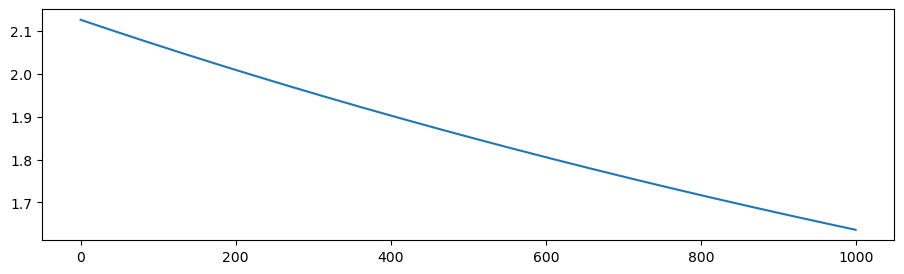

In [9]:
np.random.seed(0)
epochs=1000
learning_rate=0.00004
num_inputs=4
num_hidden= 128
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_Tanh_v02=MLP(input_train,target_train, paramlist,hidden_activation="Tanh")
sin_MLP_8_ha_Tanh_v02.train()

counter: 1
activation: -0.52
target: -0.67
counter: 2
activation: 0.74
target: 0.97
counter: 3
activation: -2.78
target: -0.21
counter: 5
activation: 1.2
target: 0.95
counter: 6
activation: -1.25
target: -0.82
counter: 7
activation: -0.38
target: 1.0
counter: 8
activation: 0.32
target: -0.99
counter: 9
activation: 0.34
target: -0.52
counter: 10
activation: -1.55
target: -0.47
counter: 11
activation: -3.19
target: -0.11
counter: 12
activation: -1.47
target: 0.74
counter: 13
activation: -0.53
target: -0.32
counter: 14
activation: -2.27
target: 0.08
counter: 15
activation: 0.59
target: -0.07
counter: 16
activation: -0.14
target: 0.98
counter: 17
activation: -0.69
target: 0.28
counter: 18
activation: -0.91
target: 0.46
counter: 19
activation: 0.56
target: -0.92
counter: 20
activation: 0.66
target: 0.36
counter: 21
activation: 0.48
target: -0.65
counter: 22
activation: 0.81
target: 0.99
counter: 23
activation: -0.37
target: 0.68
counter: 24
activation: 1.24
target: 0.24
counter: 25
activati

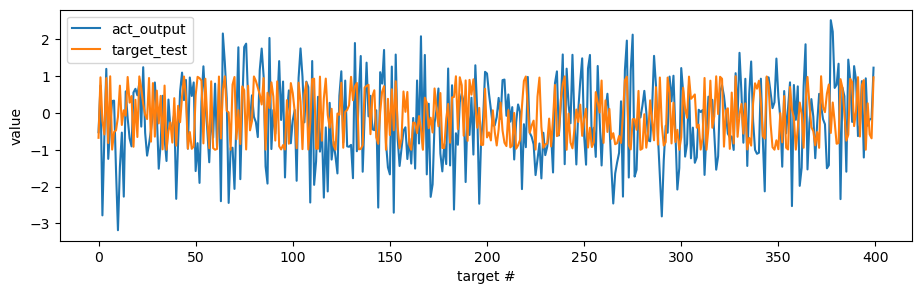

counter: 1
activation: -0.5
target: -0.78
counter: 2
activation: -1.77
target: -0.99
counter: 3
activation: -0.9
target: -0.61
counter: 4
activation: -1.05
target: -0.91
counter: 5
activation: -0.28
target: -0.9
counter: 6
activation: -1.1
target: -0.9
counter: 7
activation: 0.29
target: 0.42
counter: 8
activation: 1.54
target: -0.96
counter: 9
activation: -1.19
target: -1.0
counter: 10
activation: 2.45
target: -0.29
counter: 11
activation: -0.91
target: -0.95
counter: 12
activation: -0.26
target: -0.96
counter: 13
activation: -1.23
target: 0.03
counter: 14
activation: 0.46
target: 0.75
counter: 15
activation: -1.0
target: -0.54
counter: 16
activation: -0.87
target: -0.97
counter: 17
activation: -1.12
target: -0.58
counter: 18
activation: 0.2
target: -0.34
counter: 19
activation: 1.41
target: -0.62
counter: 20
activation: -0.25
target: -0.17
counter: 21
activation: -0.52
target: 0.94
counter: 23
activation: -1.64
target: 0.8
counter: 24
activation: 0.08
target: -0.98
counter: 25
activa

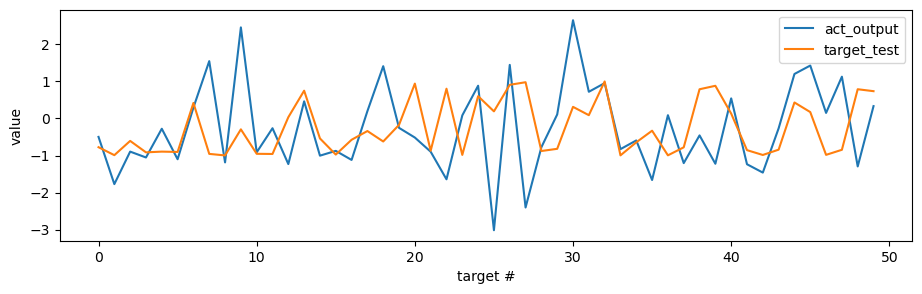

In [10]:
sin_MLP_8_ha_Tanh_v02.sin_test(input_train,target_train)
sin_MLP_8_ha_Tanh_v02.sin_test(input_test,target_test)

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]
 [-0.26213824 -0.35500448 -0.42656755  0.48769385]
 [-0.12741305 -0.10951858 -0.31319884  0.19437259]
 [-0.40347446 -0.05318507 -0.22386664  0.09672562]
 [-0.12770128 -0.29515805 -0.00704556  0.10708297]
 [ 0.01662931  0.07561797 -0.15858052 -0.09068529]
 [-0.16811511 -0.08988829 -0.20328657 -0.43157065]
 [ 0.04435654 -0.10044523 -0.40754959  0.11569556]
 [-0.22682459  0.01298635  0.18227264  0.03224573]
 [ 0.28485017 -0.30870646  0.10058541 -0.17120252

epoch:1 cost:2.1766
epoch:2 cost:2.1760
epoch:3 cost:2.1753
epoch:4 cost:2.1746
epoch:5 cost:2.1740
epoch:6 cost:2.1733
epoch:7 cost:2.1727
epoch:8 cost:2.1720
epoch:9 cost:2.1714
epoch:10 cost:2.1707
epoch:11 cost:2.1701
epoch:12 cost:2.1694
epoch:13 cost:2.1688
epoch:14 cost:2.1681
epoch:15 cost:2.1675
epoch:16 cost:2.1668
epoch:17 cost:2.1662
epoch:18 cost:2.1655
epoch:19 cost:2.1649
epoch:20 cost:2.1642
epoch:21 cost:2.1636
epoch:22 cost:2.1629
epoch:23 cost:2.1623
epoch:24 cost:2.1616
epoch:25 cost:2.1610
epoch:26 cost:2.1603
epoch:27 cost:2.1597
epoch:28 cost:2.1590
epoch:29 cost:2.1584
epoch:30 cost:2.1578
epoch:31 cost:2.1571
epoch:32 cost:2.1565
epoch:33 cost:2.1558
epoch:34 cost:2.1552
epoch:35 cost:2.1545
epoch:36 cost:2.1539
epoch:37 cost:2.1533
epoch:38 cost:2.1526
epoch:39 cost:2.1520
epoch:40 cost:2.1513
epoch:41 cost:2.1507
epoch:42 cost:2.1500
epoch:43 cost:2.1494
epoch:44 cost:2.1488
epoch:45 cost:2.1481
epoch:46 cost:2.1475
epoch:47 cost:2.1468
epoch:48 cost:2.1462
e

epoch:379 cost:1.9522
epoch:380 cost:1.9517
epoch:381 cost:1.9512
epoch:382 cost:1.9506
epoch:383 cost:1.9501
epoch:384 cost:1.9496
epoch:385 cost:1.9490
epoch:386 cost:1.9485
epoch:387 cost:1.9480
epoch:388 cost:1.9474
epoch:389 cost:1.9469
epoch:390 cost:1.9464
epoch:391 cost:1.9458
epoch:392 cost:1.9453
epoch:393 cost:1.9448
epoch:394 cost:1.9442
epoch:395 cost:1.9437
epoch:396 cost:1.9432
epoch:397 cost:1.9426
epoch:398 cost:1.9421
epoch:399 cost:1.9416
epoch:400 cost:1.9410
epoch:401 cost:1.9405
epoch:402 cost:1.9400
epoch:403 cost:1.9394
epoch:404 cost:1.9389
epoch:405 cost:1.9384
epoch:406 cost:1.9379
epoch:407 cost:1.9373
epoch:408 cost:1.9368
epoch:409 cost:1.9363
epoch:410 cost:1.9357
epoch:411 cost:1.9352
epoch:412 cost:1.9347
epoch:413 cost:1.9342
epoch:414 cost:1.9336
epoch:415 cost:1.9331
epoch:416 cost:1.9326
epoch:417 cost:1.9321
epoch:418 cost:1.9315
epoch:419 cost:1.9310
epoch:420 cost:1.9305
epoch:421 cost:1.9300
epoch:422 cost:1.9294
epoch:423 cost:1.9289
epoch:424 

epoch:752 cost:1.7704
epoch:753 cost:1.7699
epoch:754 cost:1.7695
epoch:755 cost:1.7691
epoch:756 cost:1.7686
epoch:757 cost:1.7682
epoch:758 cost:1.7677
epoch:759 cost:1.7673
epoch:760 cost:1.7669
epoch:761 cost:1.7664
epoch:762 cost:1.7660
epoch:763 cost:1.7655
epoch:764 cost:1.7651
epoch:765 cost:1.7647
epoch:766 cost:1.7642
epoch:767 cost:1.7638
epoch:768 cost:1.7633
epoch:769 cost:1.7629
epoch:770 cost:1.7625
epoch:771 cost:1.7620
epoch:772 cost:1.7616
epoch:773 cost:1.7612
epoch:774 cost:1.7607
epoch:775 cost:1.7603
epoch:776 cost:1.7598
epoch:777 cost:1.7594
epoch:778 cost:1.7590
epoch:779 cost:1.7585
epoch:780 cost:1.7581
epoch:781 cost:1.7577
epoch:782 cost:1.7572
epoch:783 cost:1.7568
epoch:784 cost:1.7564
epoch:785 cost:1.7559
epoch:786 cost:1.7555
epoch:787 cost:1.7551
epoch:788 cost:1.7546
epoch:789 cost:1.7542
epoch:790 cost:1.7538
epoch:791 cost:1.7533
epoch:792 cost:1.7529
epoch:793 cost:1.7525
epoch:794 cost:1.7520
epoch:795 cost:1.7516
epoch:796 cost:1.7512
epoch:797 

epoch:1119 cost:1.6225
epoch:1120 cost:1.6221
epoch:1121 cost:1.6218
epoch:1122 cost:1.6214
epoch:1123 cost:1.6210
epoch:1124 cost:1.6207
epoch:1125 cost:1.6203
epoch:1126 cost:1.6199
epoch:1127 cost:1.6196
epoch:1128 cost:1.6192
epoch:1129 cost:1.6189
epoch:1130 cost:1.6185
epoch:1131 cost:1.6181
epoch:1132 cost:1.6178
epoch:1133 cost:1.6174
epoch:1134 cost:1.6170
epoch:1135 cost:1.6167
epoch:1136 cost:1.6163
epoch:1137 cost:1.6159
epoch:1138 cost:1.6156
epoch:1139 cost:1.6152
epoch:1140 cost:1.6149
epoch:1141 cost:1.6145
epoch:1142 cost:1.6141
epoch:1143 cost:1.6138
epoch:1144 cost:1.6134
epoch:1145 cost:1.6130
epoch:1146 cost:1.6127
epoch:1147 cost:1.6123
epoch:1148 cost:1.6120
epoch:1149 cost:1.6116
epoch:1150 cost:1.6112
epoch:1151 cost:1.6109
epoch:1152 cost:1.6105
epoch:1153 cost:1.6102
epoch:1154 cost:1.6098
epoch:1155 cost:1.6094
epoch:1156 cost:1.6091
epoch:1157 cost:1.6087
epoch:1158 cost:1.6084
epoch:1159 cost:1.6080
epoch:1160 cost:1.6076
epoch:1161 cost:1.6073
epoch:1162 

epoch:1476 cost:1.5028
epoch:1477 cost:1.5025
epoch:1478 cost:1.5022
epoch:1479 cost:1.5019
epoch:1480 cost:1.5015
epoch:1481 cost:1.5012
epoch:1482 cost:1.5009
epoch:1483 cost:1.5006
epoch:1484 cost:1.5003
epoch:1485 cost:1.5000
epoch:1486 cost:1.4997
epoch:1487 cost:1.4994
epoch:1488 cost:1.4991
epoch:1489 cost:1.4988
epoch:1490 cost:1.4985
epoch:1491 cost:1.4982
epoch:1492 cost:1.4979
epoch:1493 cost:1.4976
epoch:1494 cost:1.4973
epoch:1495 cost:1.4970
epoch:1496 cost:1.4967
epoch:1497 cost:1.4964
epoch:1498 cost:1.4961
epoch:1499 cost:1.4958
epoch:1500 cost:1.4955
epoch:1501 cost:1.4952
epoch:1502 cost:1.4949
epoch:1503 cost:1.4946
epoch:1504 cost:1.4943
epoch:1505 cost:1.4940
epoch:1506 cost:1.4937
epoch:1507 cost:1.4934
epoch:1508 cost:1.4931
epoch:1509 cost:1.4928
epoch:1510 cost:1.4924
epoch:1511 cost:1.4921
epoch:1512 cost:1.4918
epoch:1513 cost:1.4915
epoch:1514 cost:1.4912
epoch:1515 cost:1.4909
epoch:1516 cost:1.4906
epoch:1517 cost:1.4903
epoch:1518 cost:1.4900
epoch:1519 

epoch:1833 cost:1.4026
epoch:1834 cost:1.4023
epoch:1835 cost:1.4021
epoch:1836 cost:1.4018
epoch:1837 cost:1.4016
epoch:1838 cost:1.4013
epoch:1839 cost:1.4011
epoch:1840 cost:1.4008
epoch:1841 cost:1.4006
epoch:1842 cost:1.4003
epoch:1843 cost:1.4000
epoch:1844 cost:1.3998
epoch:1845 cost:1.3995
epoch:1846 cost:1.3993
epoch:1847 cost:1.3990
epoch:1848 cost:1.3988
epoch:1849 cost:1.3985
epoch:1850 cost:1.3983
epoch:1851 cost:1.3980
epoch:1852 cost:1.3978
epoch:1853 cost:1.3975
epoch:1854 cost:1.3972
epoch:1855 cost:1.3970
epoch:1856 cost:1.3967
epoch:1857 cost:1.3965
epoch:1858 cost:1.3962
epoch:1859 cost:1.3960
epoch:1860 cost:1.3957
epoch:1861 cost:1.3955
epoch:1862 cost:1.3952
epoch:1863 cost:1.3950
epoch:1864 cost:1.3947
epoch:1865 cost:1.3945
epoch:1866 cost:1.3942
epoch:1867 cost:1.3940
epoch:1868 cost:1.3937
epoch:1869 cost:1.3934
epoch:1870 cost:1.3932
epoch:1871 cost:1.3929
epoch:1872 cost:1.3927
epoch:1873 cost:1.3924
epoch:1874 cost:1.3922
epoch:1875 cost:1.3919
epoch:1876 

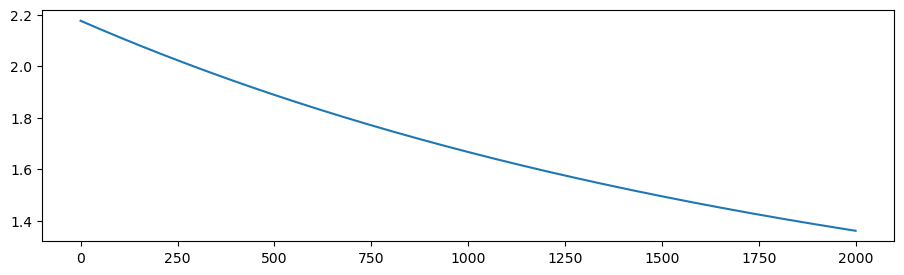

In [8]:
np.random.seed(0)
epochs=2000
learning_rate=0.00004
num_inputs=4
num_hidden= 128
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_Tanh_v03=MLP(input_train,target_train, paramlist,hidden_activation="Tanh")
sin_MLP_8_ha_Tanh_v03.train()

counter: 1
activation: 0.44
target: -0.63
counter: 2
activation: 1.01
target: 0.14
counter: 3
activation: -1.31
target: 0.31
counter: 4
activation: -0.27
target: -0.04
counter: 5
activation: -1.77
target: -0.78
counter: 6
activation: -0.61
target: 0.27
counter: 7
activation: -0.95
target: 0.96
counter: 8
activation: -1.14
target: -0.82
counter: 9
activation: 0.1
target: 0.86
counter: 10
activation: -1.4
target: 0.96
counter: 11
activation: 0.05
target: 0.65
counter: 12
activation: -0.47
target: -1.0
counter: 13
activation: 1.04
target: 0.95
counter: 14
activation: -0.19
target: 0.38
counter: 15
activation: -0.75
target: 0.29
counter: 16
activation: -0.45
target: -0.88
counter: 17
activation: 0.02
target: 0.55
counter: 18
activation: 0.42
target: -0.88
counter: 19
activation: 0.02
target: 0.95
counter: 20
activation: -1.38
target: 0.33
counter: 21
activation: 1.18
target: 0.29
counter: 22
activation: -0.49
target: 0.83
counter: 23
activation: 0.24
target: -0.68
counter: 24
activation: -

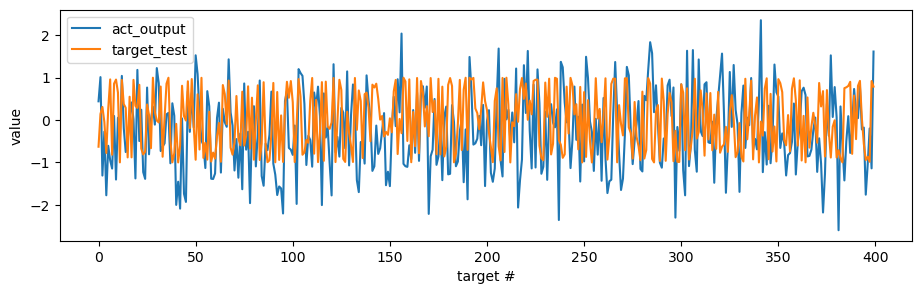

counter: 1
activation: 0.62
target: 0.88
counter: 2
activation: 0.51
target: 0.64
counter: 3
activation: -1.2
target: 0.83
counter: 4
activation: 0.4
target: 0.48
counter: 5
activation: 0.23
target: -0.2
counter: 6
activation: 1.13
target: -0.66
counter: 7
activation: -0.0
target: 1.0
counter: 9
activation: 1.25
target: 0.97
counter: 10
activation: 0.25
target: -0.22
counter: 11
activation: 1.54
target: 0.62
counter: 13
activation: -0.44
target: 0.78
counter: 14
activation: -0.92
target: 0.72
counter: 15
activation: 0.6
target: 0.35
counter: 16
activation: 0.11
target: 0.16
counter: 17
activation: -0.86
target: -0.6
counter: 18
activation: -0.5
target: 0.99
counter: 19
activation: 0.56
target: -1.0
counter: 20
activation: -2.45
target: -0.42
counter: 21
activation: -1.18
target: -0.51
counter: 22
activation: 0.08
target: 0.94
counter: 23
activation: -1.81
target: 0.74
counter: 24
activation: -0.35
target: 0.39
counter: 25
activation: -0.4
target: -0.73
counter: 26
activation: 0.56
targ

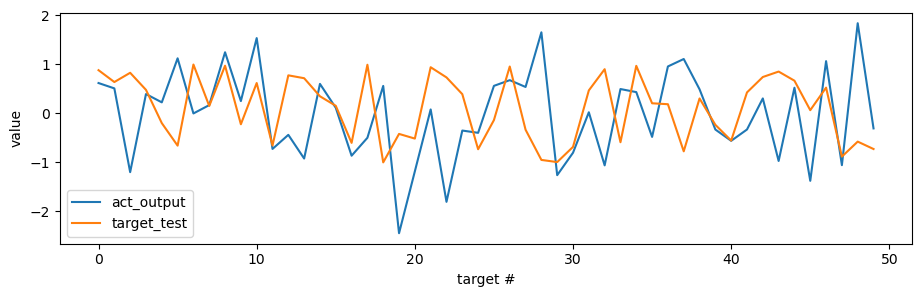

In [9]:
sin_MLP_8_ha_Tanh_v03.sin_test(input_train,target_train)
sin_MLP_8_ha_Tanh_v03.sin_test(input_test,target_test)

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]
 [-0.26213824 -0.35500448 -0.42656755  0.48769385]
 [-0.12741305 -0.10951858 -0.31319884  0.19437259]
 [-0.40347446 -0.05318507 -0.22386664  0.09672562]
 [-0.12770128 -0.29515805 -0.00704556  0.10708297]
 [ 0.01662931  0.07561797 -0.15858052 -0.09068529]
 [-0.16811511 -0.08988829 -0.20328657 -0.43157065]
 [ 0.04435654 -0.10044523 -0.40754959  0.11569556]
 [-0.22682459  0.01298635  0.18227264  0.03224573]
 [ 0.28485017 -0.30870646  0.10058541 -0.17120252

epoch:231 cost:0.5774
epoch:232 cost:0.5773
epoch:233 cost:0.5772
epoch:234 cost:0.5772
epoch:235 cost:0.5771
epoch:236 cost:0.5770
epoch:237 cost:0.5770
epoch:238 cost:0.5769
epoch:239 cost:0.5768
epoch:240 cost:0.5767
epoch:241 cost:0.5767
epoch:242 cost:0.5766
epoch:243 cost:0.5765
epoch:244 cost:0.5765
epoch:245 cost:0.5764
epoch:246 cost:0.5763
epoch:247 cost:0.5763
epoch:248 cost:0.5762
epoch:249 cost:0.5761
epoch:250 cost:0.5760
epoch:251 cost:0.5760
epoch:252 cost:0.5759
epoch:253 cost:0.5758
epoch:254 cost:0.5758
epoch:255 cost:0.5757
epoch:256 cost:0.5756
epoch:257 cost:0.5756
epoch:258 cost:0.5755
epoch:259 cost:0.5754
epoch:260 cost:0.5754
epoch:261 cost:0.5753
epoch:262 cost:0.5752
epoch:263 cost:0.5752
epoch:264 cost:0.5751
epoch:265 cost:0.5750
epoch:266 cost:0.5750
epoch:267 cost:0.5749
epoch:268 cost:0.5748
epoch:269 cost:0.5748
epoch:270 cost:0.5747
epoch:271 cost:0.5746
epoch:272 cost:0.5745
epoch:273 cost:0.5745
epoch:274 cost:0.5744
epoch:275 cost:0.5743
epoch:276 

epoch:604 cost:0.5559
epoch:605 cost:0.5559
epoch:606 cost:0.5558
epoch:607 cost:0.5558
epoch:608 cost:0.5558
epoch:609 cost:0.5557
epoch:610 cost:0.5557
epoch:611 cost:0.5556
epoch:612 cost:0.5556
epoch:613 cost:0.5555
epoch:614 cost:0.5555
epoch:615 cost:0.5554
epoch:616 cost:0.5554
epoch:617 cost:0.5553
epoch:618 cost:0.5553
epoch:619 cost:0.5553
epoch:620 cost:0.5552
epoch:621 cost:0.5552
epoch:622 cost:0.5551
epoch:623 cost:0.5551
epoch:624 cost:0.5550
epoch:625 cost:0.5550
epoch:626 cost:0.5549
epoch:627 cost:0.5549
epoch:628 cost:0.5548
epoch:629 cost:0.5548
epoch:630 cost:0.5548
epoch:631 cost:0.5547
epoch:632 cost:0.5547
epoch:633 cost:0.5546
epoch:634 cost:0.5546
epoch:635 cost:0.5545
epoch:636 cost:0.5545
epoch:637 cost:0.5544
epoch:638 cost:0.5544
epoch:639 cost:0.5544
epoch:640 cost:0.5543
epoch:641 cost:0.5543
epoch:642 cost:0.5542
epoch:643 cost:0.5542
epoch:644 cost:0.5541
epoch:645 cost:0.5541
epoch:646 cost:0.5540
epoch:647 cost:0.5540
epoch:648 cost:0.5540
epoch:649 

epoch:977 cost:0.5419
epoch:978 cost:0.5419
epoch:979 cost:0.5419
epoch:980 cost:0.5418
epoch:981 cost:0.5418
epoch:982 cost:0.5418
epoch:983 cost:0.5417
epoch:984 cost:0.5417
epoch:985 cost:0.5417
epoch:986 cost:0.5417
epoch:987 cost:0.5416
epoch:988 cost:0.5416
epoch:989 cost:0.5416
epoch:990 cost:0.5415
epoch:991 cost:0.5415
epoch:992 cost:0.5415
epoch:993 cost:0.5414
epoch:994 cost:0.5414
epoch:995 cost:0.5414
epoch:996 cost:0.5414
epoch:997 cost:0.5413
epoch:998 cost:0.5413
epoch:999 cost:0.5413
epoch:1000 cost:0.5412
epoch:1001 cost:0.5412
epoch:1002 cost:0.5412
epoch:1003 cost:0.5412
epoch:1004 cost:0.5411
epoch:1005 cost:0.5411
epoch:1006 cost:0.5411
epoch:1007 cost:0.5410
epoch:1008 cost:0.5410
epoch:1009 cost:0.5410
epoch:1010 cost:0.5409
epoch:1011 cost:0.5409
epoch:1012 cost:0.5409
epoch:1013 cost:0.5409
epoch:1014 cost:0.5408
epoch:1015 cost:0.5408
epoch:1016 cost:0.5408
epoch:1017 cost:0.5407
epoch:1018 cost:0.5407
epoch:1019 cost:0.5407
epoch:1020 cost:0.5407
epoch:1021 

epoch:1335 cost:0.5331
epoch:1336 cost:0.5331
epoch:1337 cost:0.5330
epoch:1338 cost:0.5330
epoch:1339 cost:0.5330
epoch:1340 cost:0.5330
epoch:1341 cost:0.5330
epoch:1342 cost:0.5329
epoch:1343 cost:0.5329
epoch:1344 cost:0.5329
epoch:1345 cost:0.5329
epoch:1346 cost:0.5329
epoch:1347 cost:0.5328
epoch:1348 cost:0.5328
epoch:1349 cost:0.5328
epoch:1350 cost:0.5328
epoch:1351 cost:0.5328
epoch:1352 cost:0.5327
epoch:1353 cost:0.5327
epoch:1354 cost:0.5327
epoch:1355 cost:0.5327
epoch:1356 cost:0.5327
epoch:1357 cost:0.5326
epoch:1358 cost:0.5326
epoch:1359 cost:0.5326
epoch:1360 cost:0.5326
epoch:1361 cost:0.5326
epoch:1362 cost:0.5325
epoch:1363 cost:0.5325
epoch:1364 cost:0.5325
epoch:1365 cost:0.5325
epoch:1366 cost:0.5325
epoch:1367 cost:0.5325
epoch:1368 cost:0.5324
epoch:1369 cost:0.5324
epoch:1370 cost:0.5324
epoch:1371 cost:0.5324
epoch:1372 cost:0.5324
epoch:1373 cost:0.5323
epoch:1374 cost:0.5323
epoch:1375 cost:0.5323
epoch:1376 cost:0.5323
epoch:1377 cost:0.5323
epoch:1378 

epoch:1692 cost:0.5272
epoch:1693 cost:0.5272
epoch:1694 cost:0.5272
epoch:1695 cost:0.5272
epoch:1696 cost:0.5272
epoch:1697 cost:0.5272
epoch:1698 cost:0.5272
epoch:1699 cost:0.5272
epoch:1700 cost:0.5271
epoch:1701 cost:0.5271
epoch:1702 cost:0.5271
epoch:1703 cost:0.5271
epoch:1704 cost:0.5271
epoch:1705 cost:0.5271
epoch:1706 cost:0.5271
epoch:1707 cost:0.5270
epoch:1708 cost:0.5270
epoch:1709 cost:0.5270
epoch:1710 cost:0.5270
epoch:1711 cost:0.5270
epoch:1712 cost:0.5270
epoch:1713 cost:0.5270
epoch:1714 cost:0.5270
epoch:1715 cost:0.5269
epoch:1716 cost:0.5269
epoch:1717 cost:0.5269
epoch:1718 cost:0.5269
epoch:1719 cost:0.5269
epoch:1720 cost:0.5269
epoch:1721 cost:0.5269
epoch:1722 cost:0.5269
epoch:1723 cost:0.5268
epoch:1724 cost:0.5268
epoch:1725 cost:0.5268
epoch:1726 cost:0.5268
epoch:1727 cost:0.5268
epoch:1728 cost:0.5268
epoch:1729 cost:0.5268
epoch:1730 cost:0.5268
epoch:1731 cost:0.5267
epoch:1732 cost:0.5267
epoch:1733 cost:0.5267
epoch:1734 cost:0.5267
epoch:1735 

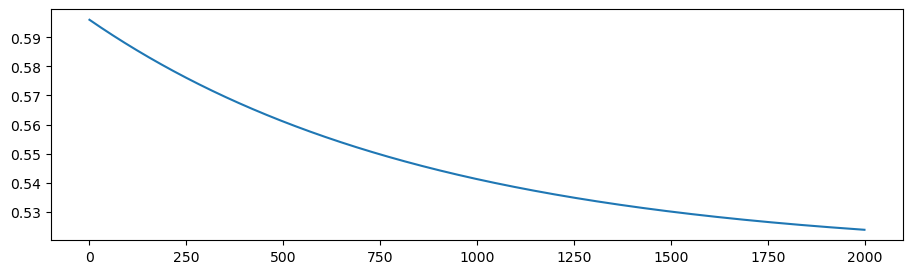

In [9]:
np.random.seed(0)
epochs=2000
learning_rate=0.0002
num_inputs=4
num_hidden= 50
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_Tanh_v04=MLP(input_train,target_train, paramlist,hidden_activation="Tanh")
sin_MLP_8_ha_Tanh_v04.train()

counter: 1
activation: 0.56
target: 0.25
counter: 2
activation: 0.53
target: -0.54
counter: 3
activation: 0.13
target: 0.79
counter: 4
activation: 0.68
target: -0.22
counter: 5
activation: 0.68
target: 0.11
counter: 6
activation: 0.44
target: 0.04
counter: 7
activation: 0.05
target: -0.96
counter: 8
activation: -0.02
target: 0.09
counter: 9
activation: -0.13
target: 0.86
counter: 10
activation: 0.12
target: 0.22
counter: 11
activation: -0.32
target: -0.74
counter: 12
activation: -0.06
target: 0.58
counter: 13
activation: 0.07
target: 0.88
counter: 14
activation: -0.18
target: -0.28
counter: 15
activation: 0.13
target: 0.81
counter: 16
activation: -0.4
target: -0.66
counter: 17
activation: 0.25
target: -0.87
counter: 18
activation: -0.3
target: -0.83
counter: 19
activation: 0.32
target: 0.58
counter: 20
activation: -0.23
target: 0.21
counter: 21
activation: -0.11
target: 0.99
counter: 22
activation: 0.53
target: 0.95
counter: 23
activation: 0.27
target: -0.84
counter: 24
activation: 0.2

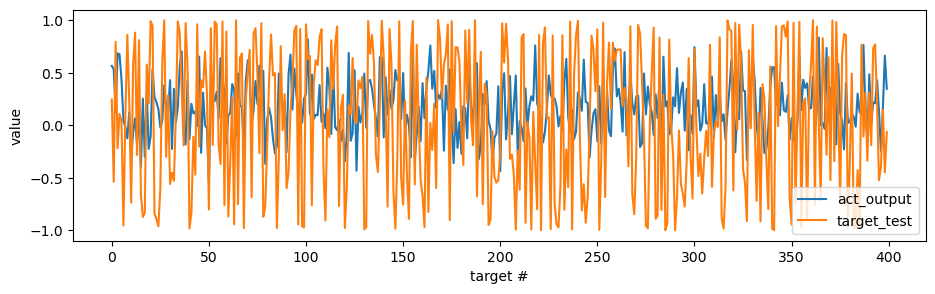

counter: 1
activation: -0.05
target: 0.88
counter: 3
activation: -0.36
target: -0.78
counter: 4
activation: -0.08
target: 0.4
counter: 5
activation: -0.28
target: -0.73
counter: 6
activation: 0.52
target: -0.5
counter: 7
activation: 0.04
target: 0.97
counter: 8
activation: -0.3
target: 0.25
counter: 9
activation: 0.52
target: 0.76
counter: 10
activation: 0.29
target: 0.63
counter: 11
activation: -0.21
target: 0.48
counter: 12
activation: 0.25
target: -0.32
counter: 13
activation: 0.15
target: 0.35
counter: 14
activation: 0.34
target: -0.97
counter: 15
activation: -0.42
target: 0.64
counter: 16
activation: -0.11
target: 0.93
counter: 17
activation: 0.42
target: 0.97
counter: 18
activation: 0.19
target: 0.95
counter: 19
activation: -0.27
target: -0.23
counter: 20
activation: 0.37
target: -0.44
counter: 21
activation: 0.22
target: 0.25
counter: 22
activation: 0.17
target: -1.0
counter: 23
activation: -0.21
target: 0.66
counter: 24
activation: 0.38
target: 0.96
counter: 25
activation: 0.48

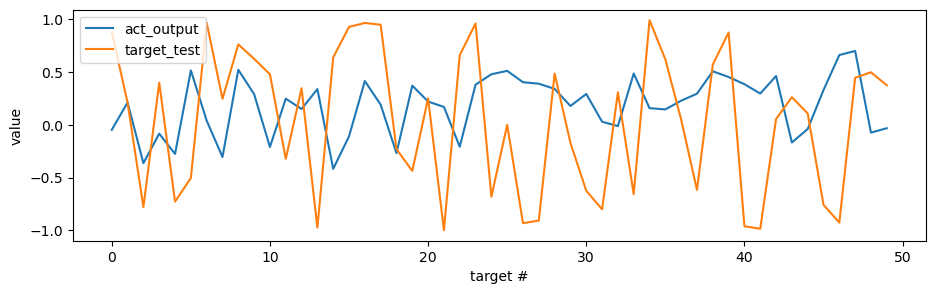

In [10]:
sin_MLP_8_ha_Tanh_v04.sin_test(input_train,target_train)
sin_MLP_8_ha_Tanh_v04.sin_test(input_test,target_test)

weights @ start, input->hidden : [[ 0.44101309  0.1000393   0.2446845   0.5602233 ]
 [ 0.4668895  -0.24431947  0.2375221  -0.0378393 ]
 [-0.02580471  0.10264963  0.03601089  0.36356838]
 [ 0.19025943  0.03041875  0.11096581  0.08341858]
 [ 0.37351977 -0.05128957  0.07826693 -0.21352393]
 [-0.63824745  0.16340465  0.21610905 -0.18554126]
 [ 0.56743866 -0.36359142  0.01143963 -0.04679596]
 [ 0.3831948   0.36733969  0.03873686  0.09454063]
 [-0.22194644 -0.49519912 -0.08697804  0.03908724]
 [ 0.30757267  0.30059496 -0.0968317  -0.07557569]
 [-0.26213824 -0.35500448 -0.42656755  0.48769385]
 [-0.12741305 -0.10951858 -0.31319884  0.19437259]
 [-0.40347446 -0.05318507 -0.22386664  0.09672562]
 [-0.12770128 -0.29515805 -0.00704556  0.10708297]
 [ 0.01662931  0.07561797 -0.15858052 -0.09068529]
 [-0.16811511 -0.08988829 -0.20328657 -0.43157065]
 [ 0.04435654 -0.10044523 -0.40754959  0.11569556]
 [-0.22682459  0.01298635  0.18227264  0.03224573]
 [ 0.28485017 -0.30870646  0.10058541 -0.17120252

epoch:1 cost:2.2113
epoch:2 cost:2.2107
epoch:3 cost:2.2100
epoch:4 cost:2.2094
epoch:5 cost:2.2087
epoch:6 cost:2.2080
epoch:7 cost:2.2074
epoch:8 cost:2.2067
epoch:9 cost:2.2060
epoch:10 cost:2.2054
epoch:11 cost:2.2047
epoch:12 cost:2.2041
epoch:13 cost:2.2034
epoch:14 cost:2.2027
epoch:15 cost:2.2021
epoch:16 cost:2.2014
epoch:17 cost:2.2008
epoch:18 cost:2.2001
epoch:19 cost:2.1994
epoch:20 cost:2.1988
epoch:21 cost:2.1981
epoch:22 cost:2.1975
epoch:23 cost:2.1968
epoch:24 cost:2.1962
epoch:25 cost:2.1955
epoch:26 cost:2.1948
epoch:27 cost:2.1942
epoch:28 cost:2.1935
epoch:29 cost:2.1929
epoch:30 cost:2.1922
epoch:31 cost:2.1916
epoch:32 cost:2.1909
epoch:33 cost:2.1903
epoch:34 cost:2.1896
epoch:35 cost:2.1889
epoch:36 cost:2.1883
epoch:37 cost:2.1876
epoch:38 cost:2.1870
epoch:39 cost:2.1863
epoch:40 cost:2.1857
epoch:41 cost:2.1850
epoch:42 cost:2.1844
epoch:43 cost:2.1837
epoch:44 cost:2.1831
epoch:45 cost:2.1824
epoch:46 cost:2.1818
epoch:47 cost:2.1811
epoch:48 cost:2.1805
e

epoch:379 cost:1.9823
epoch:380 cost:1.9817
epoch:381 cost:1.9812
epoch:382 cost:1.9806
epoch:383 cost:1.9801
epoch:384 cost:1.9795
epoch:385 cost:1.9790
epoch:386 cost:1.9784
epoch:387 cost:1.9779
epoch:388 cost:1.9773
epoch:389 cost:1.9768
epoch:390 cost:1.9762
epoch:391 cost:1.9757
epoch:392 cost:1.9751
epoch:393 cost:1.9746
epoch:394 cost:1.9740
epoch:395 cost:1.9735
epoch:396 cost:1.9729
epoch:397 cost:1.9724
epoch:398 cost:1.9718
epoch:399 cost:1.9713
epoch:400 cost:1.9708
epoch:401 cost:1.9702
epoch:402 cost:1.9697
epoch:403 cost:1.9691
epoch:404 cost:1.9686
epoch:405 cost:1.9680
epoch:406 cost:1.9675
epoch:407 cost:1.9669
epoch:408 cost:1.9664
epoch:409 cost:1.9658
epoch:410 cost:1.9653
epoch:411 cost:1.9648
epoch:412 cost:1.9642
epoch:413 cost:1.9637
epoch:414 cost:1.9631
epoch:415 cost:1.9626
epoch:416 cost:1.9620
epoch:417 cost:1.9615
epoch:418 cost:1.9610
epoch:419 cost:1.9604
epoch:420 cost:1.9599
epoch:421 cost:1.9593
epoch:422 cost:1.9588
epoch:423 cost:1.9583
epoch:424 

epoch:752 cost:1.7938
epoch:753 cost:1.7934
epoch:754 cost:1.7929
epoch:755 cost:1.7925
epoch:756 cost:1.7920
epoch:757 cost:1.7915
epoch:758 cost:1.7911
epoch:759 cost:1.7906
epoch:760 cost:1.7902
epoch:761 cost:1.7897
epoch:762 cost:1.7892
epoch:763 cost:1.7888
epoch:764 cost:1.7883
epoch:765 cost:1.7879
epoch:766 cost:1.7874
epoch:767 cost:1.7869
epoch:768 cost:1.7865
epoch:769 cost:1.7860
epoch:770 cost:1.7856
epoch:771 cost:1.7851
epoch:772 cost:1.7847
epoch:773 cost:1.7842
epoch:774 cost:1.7837
epoch:775 cost:1.7833
epoch:776 cost:1.7828
epoch:777 cost:1.7824
epoch:778 cost:1.7819
epoch:779 cost:1.7815
epoch:780 cost:1.7810
epoch:781 cost:1.7805
epoch:782 cost:1.7801
epoch:783 cost:1.7796
epoch:784 cost:1.7792
epoch:785 cost:1.7787
epoch:786 cost:1.7783
epoch:787 cost:1.7778
epoch:788 cost:1.7774
epoch:789 cost:1.7769
epoch:790 cost:1.7765
epoch:791 cost:1.7760
epoch:792 cost:1.7756
epoch:793 cost:1.7751
epoch:794 cost:1.7746
epoch:795 cost:1.7742
epoch:796 cost:1.7737
epoch:797 

epoch:1119 cost:1.6381
epoch:1120 cost:1.6377
epoch:1121 cost:1.6373
epoch:1122 cost:1.6369
epoch:1123 cost:1.6365
epoch:1124 cost:1.6361
epoch:1125 cost:1.6357
epoch:1126 cost:1.6353
epoch:1127 cost:1.6349
epoch:1128 cost:1.6346
epoch:1129 cost:1.6342
epoch:1130 cost:1.6338
epoch:1131 cost:1.6334
epoch:1132 cost:1.6330
epoch:1133 cost:1.6326
epoch:1134 cost:1.6322
epoch:1135 cost:1.6318
epoch:1136 cost:1.6315
epoch:1137 cost:1.6311
epoch:1138 cost:1.6307
epoch:1139 cost:1.6303
epoch:1140 cost:1.6299
epoch:1141 cost:1.6295
epoch:1142 cost:1.6291
epoch:1143 cost:1.6288
epoch:1144 cost:1.6284
epoch:1145 cost:1.6280
epoch:1146 cost:1.6276
epoch:1147 cost:1.6272
epoch:1148 cost:1.6268
epoch:1149 cost:1.6264
epoch:1150 cost:1.6261
epoch:1151 cost:1.6257
epoch:1152 cost:1.6253
epoch:1153 cost:1.6249
epoch:1154 cost:1.6245
epoch:1155 cost:1.6241
epoch:1156 cost:1.6238
epoch:1157 cost:1.6234
epoch:1158 cost:1.6230
epoch:1159 cost:1.6226
epoch:1160 cost:1.6222
epoch:1161 cost:1.6218
epoch:1162 

epoch:1476 cost:1.5096
epoch:1477 cost:1.5093
epoch:1478 cost:1.5090
epoch:1479 cost:1.5086
epoch:1480 cost:1.5083
epoch:1481 cost:1.5080
epoch:1482 cost:1.5076
epoch:1483 cost:1.5073
epoch:1484 cost:1.5070
epoch:1485 cost:1.5066
epoch:1486 cost:1.5063
epoch:1487 cost:1.5060
epoch:1488 cost:1.5056
epoch:1489 cost:1.5053
epoch:1490 cost:1.5050
epoch:1491 cost:1.5047
epoch:1492 cost:1.5043
epoch:1493 cost:1.5040
epoch:1494 cost:1.5037
epoch:1495 cost:1.5033
epoch:1496 cost:1.5030
epoch:1497 cost:1.5027
epoch:1498 cost:1.5024
epoch:1499 cost:1.5020
epoch:1500 cost:1.5017
epoch:1501 cost:1.5014
epoch:1502 cost:1.5010
epoch:1503 cost:1.5007
epoch:1504 cost:1.5004
epoch:1505 cost:1.5001
epoch:1506 cost:1.4997
epoch:1507 cost:1.4994
epoch:1508 cost:1.4991
epoch:1509 cost:1.4987
epoch:1510 cost:1.4984
epoch:1511 cost:1.4981
epoch:1512 cost:1.4978
epoch:1513 cost:1.4974
epoch:1514 cost:1.4971
epoch:1515 cost:1.4968
epoch:1516 cost:1.4965
epoch:1517 cost:1.4961
epoch:1518 cost:1.4958
epoch:1519 

epoch:1833 cost:1.4000
epoch:1834 cost:1.3997
epoch:1835 cost:1.3994
epoch:1836 cost:1.3992
epoch:1837 cost:1.3989
epoch:1838 cost:1.3986
epoch:1839 cost:1.3983
epoch:1840 cost:1.3980
epoch:1841 cost:1.3978
epoch:1842 cost:1.3975
epoch:1843 cost:1.3972
epoch:1844 cost:1.3969
epoch:1845 cost:1.3966
epoch:1846 cost:1.3963
epoch:1847 cost:1.3961
epoch:1848 cost:1.3958
epoch:1849 cost:1.3955
epoch:1850 cost:1.3952
epoch:1851 cost:1.3949
epoch:1852 cost:1.3946
epoch:1853 cost:1.3944
epoch:1854 cost:1.3941
epoch:1855 cost:1.3938
epoch:1856 cost:1.3935
epoch:1857 cost:1.3932
epoch:1858 cost:1.3930
epoch:1859 cost:1.3927
epoch:1860 cost:1.3924
epoch:1861 cost:1.3921
epoch:1862 cost:1.3918
epoch:1863 cost:1.3916
epoch:1864 cost:1.3913
epoch:1865 cost:1.3910
epoch:1866 cost:1.3907
epoch:1867 cost:1.3904
epoch:1868 cost:1.3902
epoch:1869 cost:1.3899
epoch:1870 cost:1.3896
epoch:1871 cost:1.3893
epoch:1872 cost:1.3890
epoch:1873 cost:1.3888
epoch:1874 cost:1.3885
epoch:1875 cost:1.3882
epoch:1876 

epoch:2190 cost:1.3061
epoch:2191 cost:1.3059
epoch:2192 cost:1.3056
epoch:2193 cost:1.3054
epoch:2194 cost:1.3051
epoch:2195 cost:1.3049
epoch:2196 cost:1.3046
epoch:2197 cost:1.3044
epoch:2198 cost:1.3042
epoch:2199 cost:1.3039
epoch:2200 cost:1.3037
epoch:2201 cost:1.3034
epoch:2202 cost:1.3032
epoch:2203 cost:1.3029
epoch:2204 cost:1.3027
epoch:2205 cost:1.3025
epoch:2206 cost:1.3022
epoch:2207 cost:1.3020
epoch:2208 cost:1.3017
epoch:2209 cost:1.3015
epoch:2210 cost:1.3012
epoch:2211 cost:1.3010
epoch:2212 cost:1.3008
epoch:2213 cost:1.3005
epoch:2214 cost:1.3003
epoch:2215 cost:1.3000
epoch:2216 cost:1.2998
epoch:2217 cost:1.2996
epoch:2218 cost:1.2993
epoch:2219 cost:1.2991
epoch:2220 cost:1.2988
epoch:2221 cost:1.2986
epoch:2222 cost:1.2984
epoch:2223 cost:1.2981
epoch:2224 cost:1.2979
epoch:2225 cost:1.2976
epoch:2226 cost:1.2974
epoch:2227 cost:1.2972
epoch:2228 cost:1.2969
epoch:2229 cost:1.2967
epoch:2230 cost:1.2964
epoch:2231 cost:1.2962
epoch:2232 cost:1.2960
epoch:2233 

epoch:2547 cost:1.2253
epoch:2548 cost:1.2251
epoch:2549 cost:1.2249
epoch:2550 cost:1.2247
epoch:2551 cost:1.2245
epoch:2552 cost:1.2243
epoch:2553 cost:1.2240
epoch:2554 cost:1.2238
epoch:2555 cost:1.2236
epoch:2556 cost:1.2234
epoch:2557 cost:1.2232
epoch:2558 cost:1.2230
epoch:2559 cost:1.2228
epoch:2560 cost:1.2226
epoch:2561 cost:1.2224
epoch:2562 cost:1.2222
epoch:2563 cost:1.2220
epoch:2564 cost:1.2217
epoch:2565 cost:1.2215
epoch:2566 cost:1.2213
epoch:2567 cost:1.2211
epoch:2568 cost:1.2209
epoch:2569 cost:1.2207
epoch:2570 cost:1.2205
epoch:2571 cost:1.2203
epoch:2572 cost:1.2201
epoch:2573 cost:1.2199
epoch:2574 cost:1.2197
epoch:2575 cost:1.2195
epoch:2576 cost:1.2193
epoch:2577 cost:1.2190
epoch:2578 cost:1.2188
epoch:2579 cost:1.2186
epoch:2580 cost:1.2184
epoch:2581 cost:1.2182
epoch:2582 cost:1.2180
epoch:2583 cost:1.2178
epoch:2584 cost:1.2176
epoch:2585 cost:1.2174
epoch:2586 cost:1.2172
epoch:2587 cost:1.2170
epoch:2588 cost:1.2168
epoch:2589 cost:1.2166
epoch:2590 

epoch:2904 cost:1.1555
epoch:2905 cost:1.1554
epoch:2906 cost:1.1552
epoch:2907 cost:1.1550
epoch:2908 cost:1.1548
epoch:2909 cost:1.1546
epoch:2910 cost:1.1544
epoch:2911 cost:1.1543
epoch:2912 cost:1.1541
epoch:2913 cost:1.1539
epoch:2914 cost:1.1537
epoch:2915 cost:1.1535
epoch:2916 cost:1.1534
epoch:2917 cost:1.1532
epoch:2918 cost:1.1530
epoch:2919 cost:1.1528
epoch:2920 cost:1.1526
epoch:2921 cost:1.1525
epoch:2922 cost:1.1523
epoch:2923 cost:1.1521
epoch:2924 cost:1.1519
epoch:2925 cost:1.1517
epoch:2926 cost:1.1516
epoch:2927 cost:1.1514
epoch:2928 cost:1.1512
epoch:2929 cost:1.1510
epoch:2930 cost:1.1508
epoch:2931 cost:1.1507
epoch:2932 cost:1.1505
epoch:2933 cost:1.1503
epoch:2934 cost:1.1501
epoch:2935 cost:1.1499
epoch:2936 cost:1.1498
epoch:2937 cost:1.1496
epoch:2938 cost:1.1494
epoch:2939 cost:1.1492
epoch:2940 cost:1.1490
epoch:2941 cost:1.1489
epoch:2942 cost:1.1487
epoch:2943 cost:1.1485
epoch:2944 cost:1.1483
epoch:2945 cost:1.1481
epoch:2946 cost:1.1480
epoch:2947 

epoch:3261 cost:1.0951
epoch:3262 cost:1.0949
epoch:3263 cost:1.0948
epoch:3264 cost:1.0946
epoch:3265 cost:1.0944
epoch:3266 cost:1.0943
epoch:3267 cost:1.0941
epoch:3268 cost:1.0940
epoch:3269 cost:1.0938
epoch:3270 cost:1.0937
epoch:3271 cost:1.0935
epoch:3272 cost:1.0933
epoch:3273 cost:1.0932
epoch:3274 cost:1.0930
epoch:3275 cost:1.0929
epoch:3276 cost:1.0927
epoch:3277 cost:1.0926
epoch:3278 cost:1.0924
epoch:3279 cost:1.0922
epoch:3280 cost:1.0921
epoch:3281 cost:1.0919
epoch:3282 cost:1.0918
epoch:3283 cost:1.0916
epoch:3284 cost:1.0915
epoch:3285 cost:1.0913
epoch:3286 cost:1.0912
epoch:3287 cost:1.0910
epoch:3288 cost:1.0908
epoch:3289 cost:1.0907
epoch:3290 cost:1.0905
epoch:3291 cost:1.0904
epoch:3292 cost:1.0902
epoch:3293 cost:1.0901
epoch:3294 cost:1.0899
epoch:3295 cost:1.0897
epoch:3296 cost:1.0896
epoch:3297 cost:1.0894
epoch:3298 cost:1.0893
epoch:3299 cost:1.0891
epoch:3300 cost:1.0890
epoch:3301 cost:1.0888
epoch:3302 cost:1.0887
epoch:3303 cost:1.0885
epoch:3304 

epoch:3618 cost:1.0425
epoch:3619 cost:1.0424
epoch:3620 cost:1.0422
epoch:3621 cost:1.0421
epoch:3622 cost:1.0420
epoch:3623 cost:1.0418
epoch:3624 cost:1.0417
epoch:3625 cost:1.0415
epoch:3626 cost:1.0414
epoch:3627 cost:1.0413
epoch:3628 cost:1.0411
epoch:3629 cost:1.0410
epoch:3630 cost:1.0409
epoch:3631 cost:1.0407
epoch:3632 cost:1.0406
epoch:3633 cost:1.0405
epoch:3634 cost:1.0403
epoch:3635 cost:1.0402
epoch:3636 cost:1.0400
epoch:3637 cost:1.0399
epoch:3638 cost:1.0398
epoch:3639 cost:1.0396
epoch:3640 cost:1.0395
epoch:3641 cost:1.0394
epoch:3642 cost:1.0392
epoch:3643 cost:1.0391
epoch:3644 cost:1.0390
epoch:3645 cost:1.0388
epoch:3646 cost:1.0387
epoch:3647 cost:1.0385
epoch:3648 cost:1.0384
epoch:3649 cost:1.0383
epoch:3650 cost:1.0381
epoch:3651 cost:1.0380
epoch:3652 cost:1.0379
epoch:3653 cost:1.0377
epoch:3654 cost:1.0376
epoch:3655 cost:1.0375
epoch:3656 cost:1.0373
epoch:3657 cost:1.0372
epoch:3658 cost:1.0371
epoch:3659 cost:1.0369
epoch:3660 cost:1.0368
epoch:3661 

epoch:3975 cost:0.9967
epoch:3976 cost:0.9965
epoch:3977 cost:0.9964
epoch:3978 cost:0.9963
epoch:3979 cost:0.9962
epoch:3980 cost:0.9961
epoch:3981 cost:0.9959
epoch:3982 cost:0.9958
epoch:3983 cost:0.9957
epoch:3984 cost:0.9956
epoch:3985 cost:0.9955
epoch:3986 cost:0.9953
epoch:3987 cost:0.9952
epoch:3988 cost:0.9951
epoch:3989 cost:0.9950
epoch:3990 cost:0.9949
epoch:3991 cost:0.9947
epoch:3992 cost:0.9946
epoch:3993 cost:0.9945
epoch:3994 cost:0.9944
epoch:3995 cost:0.9943
epoch:3996 cost:0.9941
epoch:3997 cost:0.9940
epoch:3998 cost:0.9939
epoch:3999 cost:0.9938
weights after training, input->hidden : [[ 4.32501728e-01  1.12710006e-01  2.54565875e-01  5.47295030e-01]
 [ 4.51626724e-01 -2.24934278e-01  2.52348198e-01 -6.04482895e-02]
 [-3.15140735e-02  1.09750150e-01  4.07845885e-02  3.55663252e-01]
 [ 1.91961455e-01  2.82978808e-02  1.09492851e-01  8.58207450e-02]
 [ 3.78085543e-01 -5.66982902e-02  7.45768478e-02 -2.07240386e-01]
 [-6.32959597e-01  1.54537891e-01  2.10432416e-01 

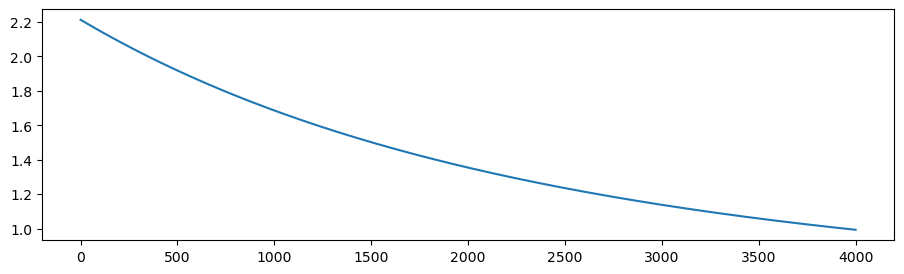

In [8]:
np.random.seed(0)
epochs=4000
learning_rate=0.00004
num_inputs=4
num_hidden= 128
num_output=1
paramlist=[epochs,learning_rate,num_inputs,num_hidden,num_output]
sin_MLP_8_ha_Tanh_v05=MLP(input_train,target_train, paramlist,hidden_activation="Tanh")
sin_MLP_8_ha_Tanh_v05.train()

counter: 1
activation: -0.62
target: -0.43
counter: 2
activation: -0.12
target: 0.98
counter: 3
activation: -0.83
target: -0.88
counter: 4
activation: -0.15
target: -0.57
counter: 5
activation: -0.9
target: 0.77
counter: 7
activation: -0.88
target: 0.43
counter: 8
activation: 1.3
target: 0.3
counter: 9
activation: 0.65
target: 0.91
counter: 10
activation: -1.32
target: -0.45
counter: 11
activation: -0.23
target: 0.57
counter: 12
activation: 0.01
target: -0.91
counter: 13
activation: 1.18
target: -0.44
counter: 14
activation: -0.81
target: -0.87
counter: 15
activation: 0.26
target: -0.24
counter: 16
activation: 1.3
target: -0.71
counter: 17
activation: -0.01
target: -0.5
counter: 18
activation: -0.54
target: -0.1
counter: 19
activation: -0.61
target: -0.95
counter: 20
activation: 0.48
target: 0.43
counter: 21
activation: -0.22
target: 0.23
counter: 22
activation: 0.43
target: -0.91
counter: 23
activation: -1.36
target: 0.38
counter: 24
activation: 0.3
target: -0.07
counter: 25
activatio

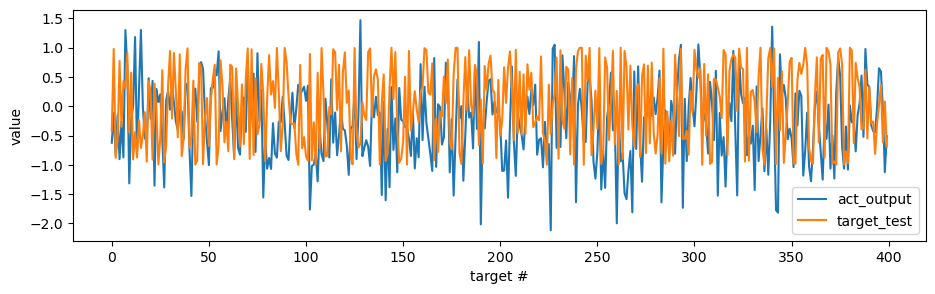

In [9]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_train,target_train)

counter: 1
activation: -0.99
target: -0.62
counter: 2
activation: -0.53
target: -0.29
counter: 3
activation: -0.56
target: -0.75
counter: 4
activation: -0.47
target: -0.37
counter: 5
activation: 0.59
target: 0.99
counter: 6
activation: -1.24
target: 0.57
counter: 7
activation: -0.68
target: -1.0
counter: 8
activation: -0.59
target: -0.25
counter: 9
activation: 0.04
target: 1.0
counter: 10
activation: 0.83
target: 0.59
counter: 11
activation: 0.08
target: 0.27
counter: 12
activation: -1.28
target: -0.55
counter: 13
activation: -0.5
target: 0.96
counter: 15
activation: -1.33
target: -0.3
counter: 17
activation: 0.36
target: 0.16
counter: 19
activation: -2.27
target: 0.16
counter: 20
activation: -1.61
target: 0.1
counter: 21
activation: -0.55
target: 0.51
counter: 22
activation: 0.09
target: 0.91
counter: 23
activation: 0.08
target: 0.97
counter: 24
activation: -0.65
target: 0.64
counter: 25
activation: -1.37
target: -1.0
counter: 26
activation: 0.19
target: -1.0
counter: 27
activation: 0

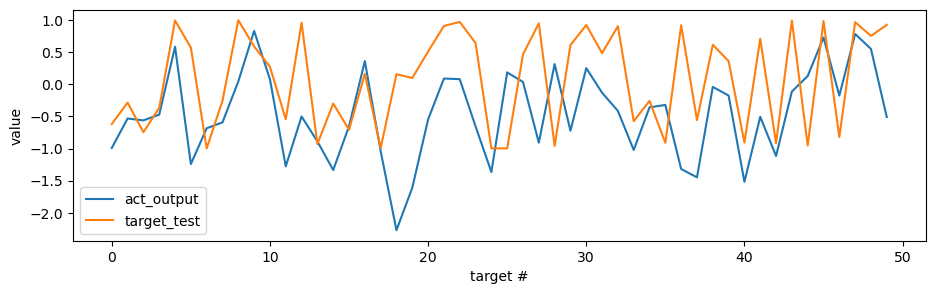

In [10]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_test,target_test)

Model seem to fit the data more accurately saving current model to a file for a possible need for rollback in case if accuracy drops at further training

In [12]:
import pickle
filename= 'sin_MLP_128_ha_Tanh_v05.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(sin_MLP_8_ha_Tanh_v05, handle, pickle.HIGHEST_PROTOCOL)

In [26]:
with open("sin_MLP_128_ha_Tanh_v05.pkl", 'rb') as file:
    sin_MLP_8_ha_Tanh_v05 = pickle.load(file)

Setting epochs to 1000 to train a bit more and see if I can improve accuracy. 

In [28]:
sin_MLP_8_ha_Tanh_v05.epochs=1000

weights @ start, input->hidden : [[ 4.32501728e-01  1.12710006e-01  2.54565875e-01  5.47295030e-01]
 [ 4.51626724e-01 -2.24934278e-01  2.52348198e-01 -6.04482895e-02]
 [-3.15140735e-02  1.09750150e-01  4.07845885e-02  3.55663252e-01]
 [ 1.91961455e-01  2.82978808e-02  1.09492851e-01  8.58207450e-02]
 [ 3.78085543e-01 -5.66982902e-02  7.45768478e-02 -2.07240386e-01]
 [-6.32959597e-01  1.54537891e-01  2.10432416e-01 -1.75372128e-01]
 [ 5.69664153e-01 -3.66708949e-01  9.04170790e-03 -4.28172359e-02]
 [ 3.98762072e-01  3.48310224e-01  2.63261674e-02  1.15267965e-01]
 [-2.23699330e-01 -4.93337728e-01 -8.56891991e-02  3.69013823e-02]
 [ 2.99026282e-01  3.10501732e-01 -9.01077632e-02 -8.67418291e-02]
 [-2.77324296e-01 -3.41302038e-01 -4.18134858e-01  4.72174860e-01]
 [-1.35355017e-01 -1.00427160e-01 -3.07417621e-01  1.84116027e-01]
 [-4.01274976e-01 -5.57292599e-02 -2.25637267e-01  9.96228044e-02]
 [-1.35760267e-01 -2.85931360e-01 -5.97831913e-04  9.64559073e-02]
 [ 2.51607019e-02  6.50985766

epoch:1 cost:0.9936
epoch:2 cost:0.9934
epoch:3 cost:0.9933
epoch:4 cost:0.9932
epoch:5 cost:0.9931
epoch:6 cost:0.9930
epoch:7 cost:0.9928
epoch:8 cost:0.9927
epoch:9 cost:0.9926
epoch:10 cost:0.9925
epoch:11 cost:0.9924
epoch:12 cost:0.9923
epoch:13 cost:0.9921
epoch:14 cost:0.9920
epoch:15 cost:0.9919
epoch:16 cost:0.9918
epoch:17 cost:0.9917
epoch:18 cost:0.9915
epoch:19 cost:0.9914
epoch:20 cost:0.9913
epoch:21 cost:0.9912
epoch:22 cost:0.9911
epoch:23 cost:0.9910
epoch:24 cost:0.9908
epoch:25 cost:0.9907
epoch:26 cost:0.9906
epoch:27 cost:0.9905
epoch:28 cost:0.9904
epoch:29 cost:0.9902
epoch:30 cost:0.9901
epoch:31 cost:0.9900
epoch:32 cost:0.9899
epoch:33 cost:0.9898
epoch:34 cost:0.9897
epoch:35 cost:0.9895
epoch:36 cost:0.9894
epoch:37 cost:0.9893
epoch:38 cost:0.9892
epoch:39 cost:0.9891
epoch:40 cost:0.9890
epoch:41 cost:0.9888
epoch:42 cost:0.9887
epoch:43 cost:0.9886
epoch:44 cost:0.9885
epoch:45 cost:0.9884
epoch:46 cost:0.9883
epoch:47 cost:0.9881
epoch:48 cost:0.9880
e

epoch:379 cost:0.9517
epoch:380 cost:0.9516
epoch:381 cost:0.9515
epoch:382 cost:0.9514
epoch:383 cost:0.9513
epoch:384 cost:0.9511
epoch:385 cost:0.9510
epoch:386 cost:0.9509
epoch:387 cost:0.9508
epoch:388 cost:0.9507
epoch:389 cost:0.9506
epoch:390 cost:0.9505
epoch:391 cost:0.9504
epoch:392 cost:0.9503
epoch:393 cost:0.9502
epoch:394 cost:0.9501
epoch:395 cost:0.9500
epoch:396 cost:0.9499
epoch:397 cost:0.9498
epoch:398 cost:0.9497
epoch:399 cost:0.9496
epoch:400 cost:0.9495
epoch:401 cost:0.9494
epoch:402 cost:0.9493
epoch:403 cost:0.9492
epoch:404 cost:0.9491
epoch:405 cost:0.9490
epoch:406 cost:0.9489
epoch:407 cost:0.9488
epoch:408 cost:0.9487
epoch:409 cost:0.9486
epoch:410 cost:0.9485
epoch:411 cost:0.9484
epoch:412 cost:0.9483
epoch:413 cost:0.9482
epoch:414 cost:0.9481
epoch:415 cost:0.9480
epoch:416 cost:0.9479
epoch:417 cost:0.9478
epoch:418 cost:0.9477
epoch:419 cost:0.9476
epoch:420 cost:0.9475
epoch:421 cost:0.9474
epoch:422 cost:0.9473
epoch:423 cost:0.9472
epoch:424 

epoch:752 cost:0.9156
epoch:753 cost:0.9156
epoch:754 cost:0.9155
epoch:755 cost:0.9154
epoch:756 cost:0.9153
epoch:757 cost:0.9152
epoch:758 cost:0.9151
epoch:759 cost:0.9150
epoch:760 cost:0.9149
epoch:761 cost:0.9148
epoch:762 cost:0.9147
epoch:763 cost:0.9147
epoch:764 cost:0.9146
epoch:765 cost:0.9145
epoch:766 cost:0.9144
epoch:767 cost:0.9143
epoch:768 cost:0.9142
epoch:769 cost:0.9141
epoch:770 cost:0.9140
epoch:771 cost:0.9139
epoch:772 cost:0.9138
epoch:773 cost:0.9138
epoch:774 cost:0.9137
epoch:775 cost:0.9136
epoch:776 cost:0.9135
epoch:777 cost:0.9134
epoch:778 cost:0.9133
epoch:779 cost:0.9132
epoch:780 cost:0.9131
epoch:781 cost:0.9130
epoch:782 cost:0.9130
epoch:783 cost:0.9129
epoch:784 cost:0.9128
epoch:785 cost:0.9127
epoch:786 cost:0.9126
epoch:787 cost:0.9125
epoch:788 cost:0.9124
epoch:789 cost:0.9123
epoch:790 cost:0.9122
epoch:791 cost:0.9122
epoch:792 cost:0.9121
epoch:793 cost:0.9120
epoch:794 cost:0.9119
epoch:795 cost:0.9118
epoch:796 cost:0.9117
epoch:797 

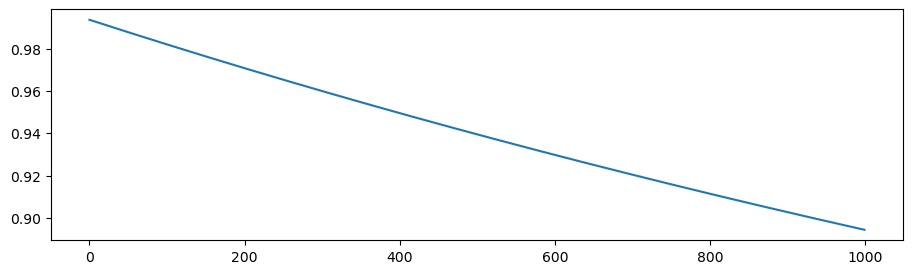

In [29]:
sin_MLP_8_ha_Tanh_v05.train()

counter: 1
activation: -0.64
target: -0.43
counter: 2
activation: -0.18
target: 0.98
counter: 3
activation: -0.81
target: -0.88
counter: 4
activation: -0.22
target: -0.57
counter: 5
activation: -0.85
target: 0.77
counter: 7
activation: -0.84
target: 0.43
counter: 8
activation: 1.04
target: 0.3
counter: 9
activation: 0.48
target: 0.91
counter: 10
activation: -1.22
target: -0.45
counter: 11
activation: -0.25
target: 0.57
counter: 12
activation: -0.09
target: -0.91
counter: 13
activation: 0.92
target: -0.44
counter: 14
activation: -0.79
target: -0.87
counter: 15
activation: 0.12
target: -0.24
counter: 16
activation: 1.02
target: -0.71
counter: 17
activation: -0.1
target: -0.5
counter: 18
activation: -0.55
target: -0.1
counter: 19
activation: -0.63
target: -0.95
counter: 20
activation: 0.33
target: 0.43
counter: 21
activation: -0.27
target: 0.23
counter: 22
activation: 0.27
target: -0.91
counter: 23
activation: -1.25
target: 0.38
counter: 24
activation: 0.17
target: -0.07
counter: 25
activ

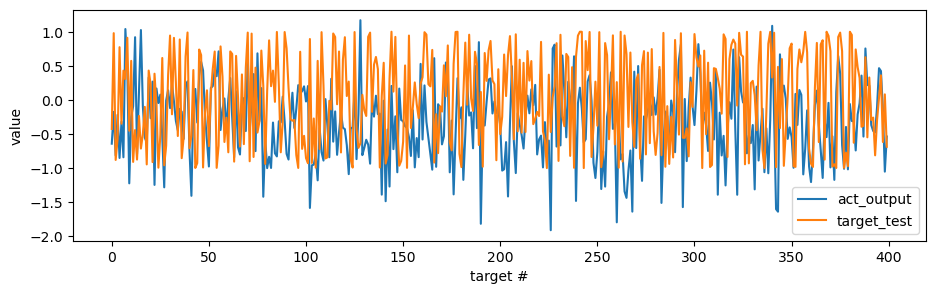

In [30]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_train,target_train)

counter: 1
activation: -0.95
target: -0.62
counter: 2
activation: -0.54
target: -0.29
counter: 3
activation: -0.6
target: -0.75
counter: 4
activation: -0.52
target: -0.37
counter: 5
activation: 0.42
target: 0.99
counter: 6
activation: -1.14
target: 0.57
counter: 7
activation: -0.69
target: -1.0
counter: 8
activation: -0.6
target: -0.25
counter: 9
activation: -0.04
target: 1.0
counter: 11
activation: -0.02
target: 0.27
counter: 12
activation: -1.19
target: -0.55
counter: 13
activation: -0.49
target: 0.96
counter: 15
activation: -1.23
target: -0.3
counter: 19
activation: -2.03
target: 0.16
counter: 20
activation: -1.46
target: 0.1
counter: 21
activation: -0.55
target: 0.51
counter: 22
activation: -0.0
target: 0.91
counter: 23
activation: -0.0
target: 0.97
counter: 24
activation: -0.61
target: 0.64
counter: 25
activation: -1.26
target: -1.0
counter: 26
activation: 0.05
target: -1.0
counter: 27
activation: -0.05
target: 0.47
counter: 28
activation: -0.85
target: 0.95
counter: 29
activation

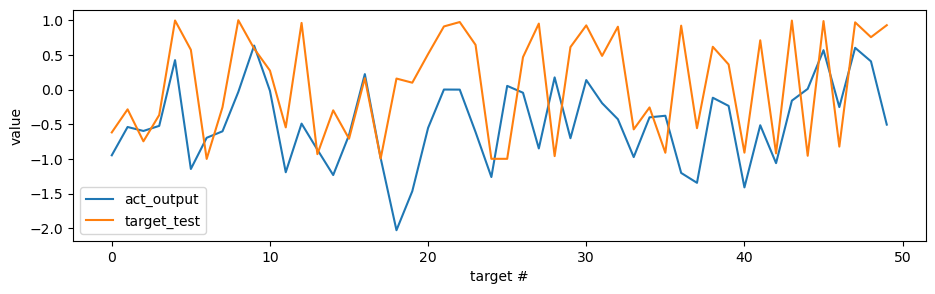

In [31]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_test,target_test)

Model seem to fit the data more accurately saving current model to a file for a possible need for rollback in case if accuracy drops at further training

In [32]:
filename= 'sin_MLP_128_ha_Tanh_v05.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(sin_MLP_8_ha_Tanh_v05, handle, pickle.HIGHEST_PROTOCOL)

Setting epochs to 100 to train a bit more and see if I can improve accuracy. 

In [33]:
sin_MLP_8_ha_Tanh_v05.epochs=100

weights @ start, input->hidden : [[ 4.31269806e-01  1.14532585e-01  2.56199499e-01  5.45216702e-01]
 [ 4.49268192e-01 -2.22015671e-01  2.54869656e-01 -6.41585644e-02]
 [-3.23525776e-02  1.10783814e-01  4.15917258e-02  3.54397495e-01]
 [ 1.92242623e-01  2.79507123e-02  1.09213713e-01  8.62535915e-02]
 [ 3.78797110e-01 -5.75296750e-02  7.39191542e-02 -2.06181592e-01]
 [-6.32243770e-01  1.53330176e-01  2.09515766e-01 -1.73833339e-01]
 [ 5.70074771e-01 -3.67279047e-01  8.53730497e-03 -4.20219327e-02]
 [ 4.01121096e-01  3.45400112e-01  2.41284985e-02  1.18737343e-01]
 [-2.23909210e-01 -4.93117815e-01 -8.55093515e-02  3.66145975e-02]
 [ 2.97702628e-01  3.12010137e-01 -8.89099896e-02 -8.86215302e-02]
 [-2.79545875e-01 -3.39346094e-01 -4.16680026e-01  4.69694526e-01]
 [-1.36512117e-01 -9.91186973e-02 -3.06439704e-01  1.82485618e-01]
 [-4.00935152e-01 -5.61143459e-02 -2.25947311e-01  1.00105587e-01]
 [-1.36950401e-01 -2.84579210e-01  5.02172815e-04  9.47372912e-02]
 [ 2.64607253e-02  6.35084139

epoch:1 cost:0.8942
epoch:2 cost:0.8941
epoch:3 cost:0.8940
epoch:4 cost:0.8939
epoch:5 cost:0.8938
epoch:6 cost:0.8937
epoch:7 cost:0.8937
epoch:8 cost:0.8936
epoch:9 cost:0.8935
epoch:10 cost:0.8934
epoch:11 cost:0.8933
epoch:12 cost:0.8933
epoch:13 cost:0.8932
epoch:14 cost:0.8931
epoch:15 cost:0.8930
epoch:16 cost:0.8929
epoch:17 cost:0.8928
epoch:18 cost:0.8928
epoch:19 cost:0.8927
epoch:20 cost:0.8926
epoch:21 cost:0.8925
epoch:22 cost:0.8924
epoch:23 cost:0.8924
epoch:24 cost:0.8923
epoch:25 cost:0.8922
epoch:26 cost:0.8921
epoch:27 cost:0.8920
epoch:28 cost:0.8919
epoch:29 cost:0.8919
epoch:30 cost:0.8918
epoch:31 cost:0.8917
epoch:32 cost:0.8916
epoch:33 cost:0.8915
epoch:34 cost:0.8915
epoch:35 cost:0.8914
epoch:36 cost:0.8913
epoch:37 cost:0.8912
epoch:38 cost:0.8911
epoch:39 cost:0.8910
epoch:40 cost:0.8910
epoch:41 cost:0.8909
epoch:42 cost:0.8908
epoch:43 cost:0.8907
epoch:44 cost:0.8906
epoch:45 cost:0.8906
epoch:46 cost:0.8905
epoch:47 cost:0.8904
epoch:48 cost:0.8903
e

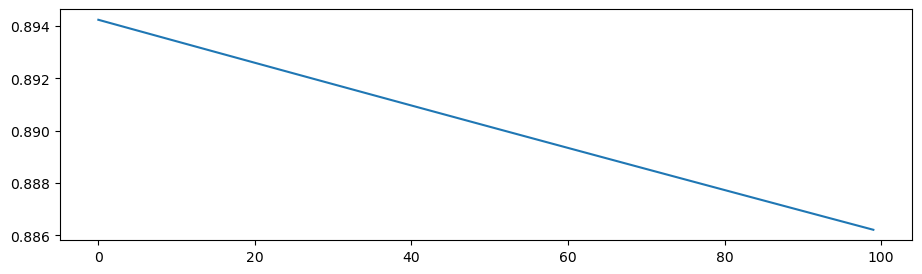

In [34]:
sin_MLP_8_ha_Tanh_v05.train()

counter: 1
activation: -0.94
target: -0.62
counter: 2
activation: -0.54
target: -0.29
counter: 3
activation: -0.6
target: -0.75
counter: 4
activation: -0.53
target: -0.37
counter: 5
activation: 0.41
target: 0.99
counter: 6
activation: -1.14
target: 0.57
counter: 7
activation: -0.7
target: -1.0
counter: 8
activation: -0.6
target: -0.25
counter: 9
activation: -0.04
target: 1.0
counter: 11
activation: -0.03
target: 0.27
counter: 12
activation: -1.18
target: -0.55
counter: 13
activation: -0.49
target: 0.96
counter: 15
activation: -1.22
target: -0.3
counter: 19
activation: -2.0
target: 0.16
counter: 20
activation: -1.45
target: 0.1
counter: 21
activation: -0.55
target: 0.51
counter: 22
activation: -0.01
target: 0.91
counter: 23
activation: -0.01
target: 0.97
counter: 24
activation: -0.61
target: 0.64
counter: 25
activation: -1.25
target: -1.0
counter: 26
activation: 0.04
target: -1.0
counter: 27
activation: -0.05
target: 0.47
counter: 28
activation: -0.84
target: 0.95
counter: 29
activation

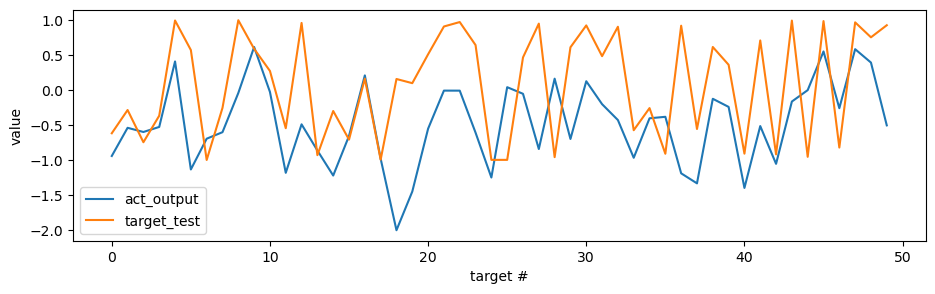

In [37]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_test,target_test)

weights @ start, input->hidden : [[ 4.31159696e-01  1.14695417e-01  2.56349648e-01  5.45026394e-01]
 [ 4.49054816e-01 -2.21752913e-01  2.55102530e-01 -6.44994469e-02]
 [-3.24277972e-02  1.10876345e-01  4.16661509e-02  3.54281734e-01]
 [ 1.92268277e-01  2.79191078e-02  1.09187535e-01  8.62938869e-02]
 [ 3.78861543e-01 -5.76046889e-02  7.38580309e-02 -2.06084021e-01]
 [-6.32180527e-01  1.53223252e-01  2.09431862e-01 -1.73693816e-01]
 [ 5.70112757e-01 -3.67331660e-01  8.48937778e-03 -4.19469692e-02]
 [ 4.01333780e-01  3.45137634e-01  2.39243508e-02  1.19057050e-01]
 [-2.23927392e-01 -4.93098828e-01 -8.54933148e-02  3.65892481e-02]
 [ 2.97582911e-01  3.12146098e-01 -8.87986132e-02 -8.87948796e-02]
 [-2.79745171e-01 -3.39171838e-01 -4.16545524e-01  4.69467704e-01]
 [-1.36615799e-01 -9.90018299e-02 -3.06349561e-01  1.82336650e-01]
 [-4.00904359e-01 -5.61490806e-02 -2.25976110e-01  1.00150110e-01]
 [-1.37057306e-01 -2.84458056e-01  6.03792396e-04  9.45797579e-02]
 [ 2.65780486e-02  6.33652086

epoch:1 cost:0.8861
epoch:2 cost:0.8860
epoch:3 cost:0.8859
epoch:4 cost:0.8858
epoch:5 cost:0.8857
epoch:6 cost:0.8857
epoch:7 cost:0.8856
epoch:8 cost:0.8855
epoch:9 cost:0.8854
epoch:10 cost:0.8853
epoch:11 cost:0.8853
epoch:12 cost:0.8852
epoch:13 cost:0.8851
epoch:14 cost:0.8850
epoch:15 cost:0.8849
epoch:16 cost:0.8849
epoch:17 cost:0.8848
epoch:18 cost:0.8847
epoch:19 cost:0.8846
epoch:20 cost:0.8845
epoch:21 cost:0.8845
epoch:22 cost:0.8844
epoch:23 cost:0.8843
epoch:24 cost:0.8842
epoch:25 cost:0.8842
epoch:26 cost:0.8841
epoch:27 cost:0.8840
epoch:28 cost:0.8839
epoch:29 cost:0.8838
epoch:30 cost:0.8838
epoch:31 cost:0.8837
epoch:32 cost:0.8836
epoch:33 cost:0.8835
epoch:34 cost:0.8834
epoch:35 cost:0.8834
epoch:36 cost:0.8833
epoch:37 cost:0.8832
epoch:38 cost:0.8831
epoch:39 cost:0.8831
epoch:40 cost:0.8830
epoch:41 cost:0.8829
epoch:42 cost:0.8828
epoch:43 cost:0.8827
epoch:44 cost:0.8827
epoch:45 cost:0.8826
epoch:46 cost:0.8825
epoch:47 cost:0.8824
epoch:48 cost:0.8823
e

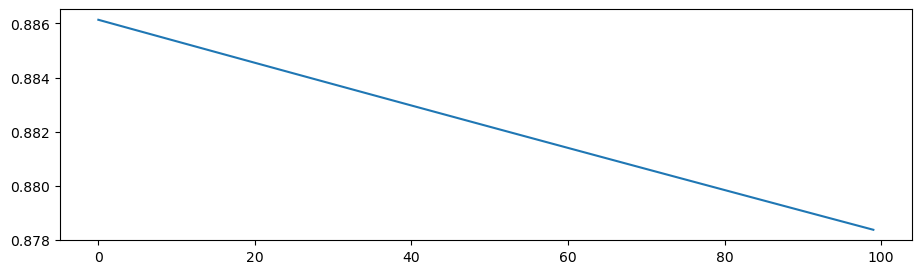

In [38]:
sin_MLP_8_ha_Tanh_v05.train()

counter: 1
activation: -0.64
target: -0.43
counter: 2
activation: -0.19
target: 0.98
counter: 3
activation: -0.81
target: -0.88
counter: 4
activation: -0.23
target: -0.57
counter: 5
activation: -0.84
target: 0.77
counter: 7
activation: -0.83
target: 0.43
counter: 8
activation: 0.99
target: 0.3
counter: 9
activation: 0.45
target: 0.91
counter: 10
activation: -1.21
target: -0.45
counter: 11
activation: -0.25
target: 0.57
counter: 12
activation: -0.11
target: -0.91
counter: 13
activation: 0.87
target: -0.44
counter: 14
activation: -0.79
target: -0.87
counter: 15
activation: 0.1
target: -0.24
counter: 16
activation: 0.98
target: -0.71
counter: 17
activation: -0.11
target: -0.5
counter: 18
activation: -0.55
target: -0.1
counter: 19
activation: -0.63
target: -0.95
counter: 20
activation: 0.3
target: 0.43
counter: 21
activation: -0.28
target: 0.23
counter: 22
activation: 0.24
target: -0.91
counter: 23
activation: -1.23
target: 0.38
counter: 24
activation: 0.15
target: -0.07
counter: 25
activa

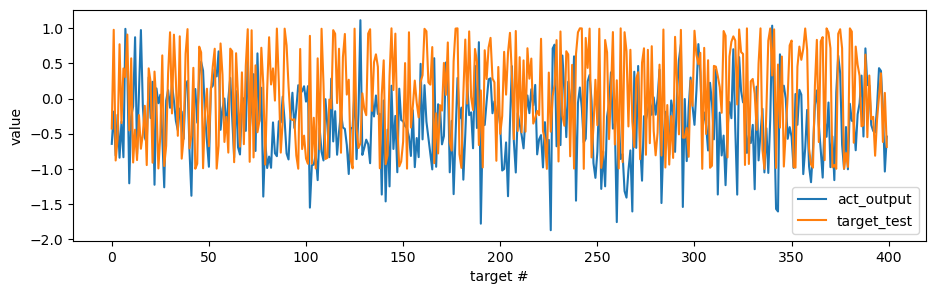

In [40]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_train,target_train)

counter: 1
activation: -0.94
target: -0.62
counter: 2
activation: -0.54
target: -0.29
counter: 3
activation: -0.6
target: -0.75
counter: 4
activation: -0.53
target: -0.37
counter: 5
activation: 0.39
target: 0.99
counter: 6
activation: -1.13
target: 0.57
counter: 7
activation: -0.7
target: -1.0
counter: 8
activation: -0.6
target: -0.25
counter: 9
activation: -0.05
target: 1.0
counter: 11
activation: -0.04
target: 0.27
counter: 12
activation: -1.17
target: -0.55
counter: 13
activation: -0.49
target: 0.96
counter: 15
activation: -1.21
target: -0.3
counter: 19
activation: -1.98
target: 0.16
counter: 20
activation: -1.44
target: 0.1
counter: 21
activation: -0.55
target: 0.51
counter: 22
activation: -0.02
target: 0.91
counter: 23
activation: -0.02
target: 0.97
counter: 24
activation: -0.6
target: 0.64
counter: 25
activation: -1.24
target: -1.0
counter: 26
activation: 0.03
target: -1.0
counter: 27
activation: -0.06
target: 0.47
counter: 28
activation: -0.84
target: 0.95
counter: 29
activation

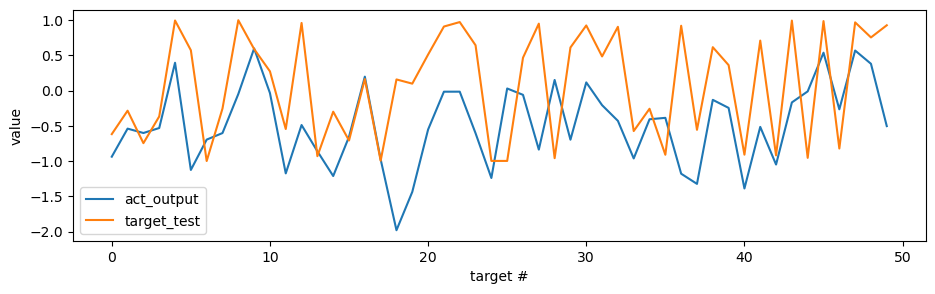

In [44]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_test,target_test)

counter: 1
activation: -0.32
target: 0.22
counter: 2
activation: 0.08
target: -0.02
counter: 3
activation: -0.75
target: 0.5
counter: 4
activation: -0.6
target: 0.58
counter: 5
activation: -0.48
target: -1.0
counter: 6
activation: -1.35
target: -0.01
counter: 7
activation: 0.43
target: 0.48
counter: 8
activation: -0.27
target: 0.3
counter: 9
activation: -0.78
target: 0.56
counter: 10
activation: 0.15
target: -0.1
counter: 11
activation: 0.43
target: 0.56
counter: 12
activation: -0.82
target: 0.01
counter: 13
activation: 0.32
target: 0.12
counter: 14
activation: -0.69
target: 0.2
counter: 15
activation: -1.76
target: -0.89
counter: 16
activation: -0.28
target: -0.13
counter: 17
activation: -0.47
target: -0.58
counter: 18
activation: -0.33
target: 0.5
counter: 19
activation: -1.62
target: -0.73
counter: 20
activation: -0.91
target: 0.3
counter: 21
activation: -0.27
target: -0.77
counter: 22
activation: -0.35
target: 0.69
counter: 23
activation: -1.14
target: -0.96
counter: 24
activation:

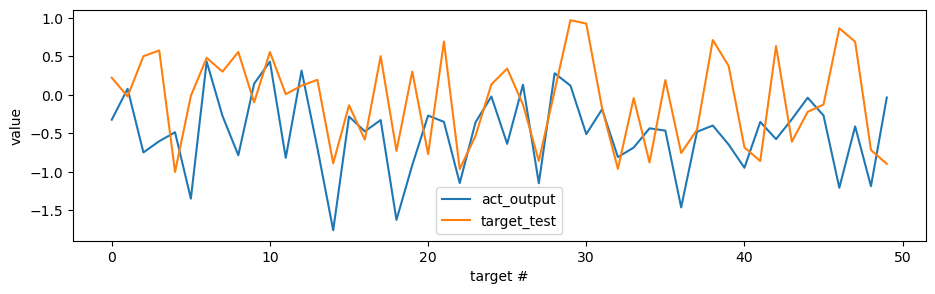

In [45]:
sin_MLP_8_ha_Tanh_v05.sin_test(input_valid,target_valid)

In [42]:
filename= 'sin_MLP_128_ha_Tanh_v05.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(sin_MLP_8_ha_Tanh_v05, handle, pickle.HIGHEST_PROTOCOL)